<h1><Center> Credit Card Default</center></h1>

## Business Understanding and Introduction
---

#### Data Set Purpose -
This data set is from the UCI Machine Learning collection. The data set is a collection of records containing information on 30,000 credit card customers from Taiwan from April to September 2005. The data set was originally collected to attempt to compare the ability of six different data mining methods to predict default.

#### Outcomes defintion -
We will be going through an entire data mining exercise with this data set including full exploratory data analysis, data cleaning and preparation, and finally attempting to make some predictions about the likelihood of default. We will be attempting to maximize the predictive performance of two different classification tasks. These are to classify if a customer will default on credit card payments after gathering 6 months of payment and charge history. Our second classification task will be to identify those customers who are likely to default after 3 months of payment and charge history in order to flag them for additional intervention to attempt to reduce default rates. 

#### Measurement of Effectiveness - Task 1 
For the our initial classification task, we will use the following metrics to determine the most effective classification:
 - F1 Scores, which is the harmonic mean of precision and recall. By using F1, we attempt to maximize both the ability of the model to correctly identify default customers and to reduce the number of non-default customers flagged as being at risk of default.
 - To evaluate one model against another, we will use McNemar's test for statistical significance. McNemar's test compares the number of false negatives generated by different algorithms on the same data set. A simple comparison of F1 scores by themselves don't provide enough information to determine if the difference between the F1 scores is statistically significant or not, so we generate and compare performance using McNemar scores. 
 


## Data Preparation

In [1]:
# Import basic libraries
import numpy as np #
import pandas as pd 
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
# Will be moving this to my github to make everyone able to access the same data
# and keep the code consistent
#cc_raw = pd.read_csv('~/Desktop/my-notebook/CC_Default/master_data.csv')
#descrip = pd.read_csv('~/Desktop/my-notebook/CC_Default/DataKey.csv')
cc_raw=pd.read_csv('https://raw.githubusercontent.com/JosDenney/Data_Mining/master/master_data.csv')
descrip = pd.read_csv('https://raw.githubusercontent.com/JosDenney/Data_Mining/master/DataKey.csv')

### Data Meaning Type -
***
The following table shows the attributes we used for analysis. For each attribute, we have provided the basic attribute features, including the name, a short description, the data type of the attribute, and the attribute type, e.g. Nominal, Ordinal, Interval or Ratio for numeric values and a notation if a non-numeric data type. Additional attribute discussion will follow the table. 

In [6]:
descrip

,Attribute,Description,Additional Details,Attribute Data Type,Attribute Value
0,ID,CustomerID,None,Numeric,Nominal
1,LIMIT_BAL,Amount of given credit,None,Numeric,Ratio
2,SEX,Gender,1=M 2=F,Numeric,Nominal
3,EDUCATION,Education level,1=grad_sch 2=undergrad 3=HS 4=other,Numeric,Ordinal
4,MARRIAGE,Marital Status,1=M 2=S 3=Other,Numeric,Nominal
5,AGE,Age in years,None,Numeric,Ordinal
6,PAY_0,Payment Status in September 2005,"<=0 == On Time/Early, >=1 == Late",Numeric,Ratio
7,PAY_2,Payment Status in August 2005,"<=0 == On Time/Early, >=1 == Late",Numeric,Ratio
8,PAY_3,Payment Status in July 2005,"<=0 == On Time/Early, >=1 == Late",Numeric,Ratio
9,PAY_4,Payment Status in June 2005,"<=0 == On Time/Early, >=1 == Late",Numeric,Ratio


### Initial EDA/Scrubbing
Here we examine the data for missing values, examine the categorical variables to ensure they don't have any anomalies, etc. 

In [6]:
cc_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [7]:
#Look for any Missing values -  shamelessly lifted from Jake Drew - EducationDataNC-master
missing_values = cc_raw.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values = missing_values[missing_values['Number Missing Values'] > 0] 

#Print all rows with missing values
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(missing_values)

Empty DataFrame
Columns: [Variable Name, Number Missing Values]
Index: []


#### Empty data frame means no missing values.
Next we will examine our categorical variables for issues:

In [8]:
#Look at categorical values for anything out of range, etc.
cc_raw[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


Some anomalies w/the EDUCATION variable - should max at 4 categories, but there are some observations w/6 as a value. Similarly MARRIAGE has 4 values from 0 to 3. 

### Categorical Variable Visualization and Examination

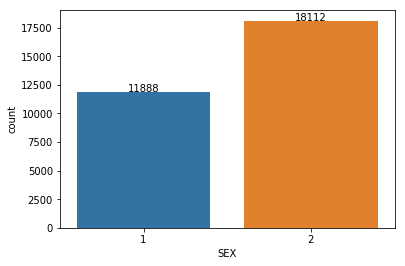

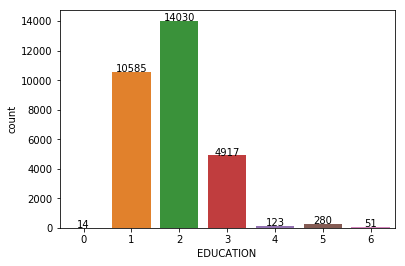

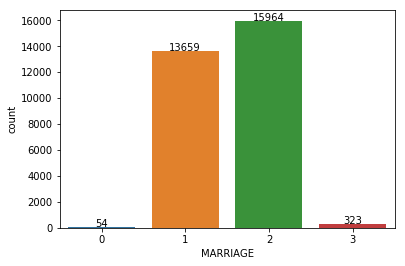

In [9]:
cat_list_obj =('SEX','EDUCATION','MARRIAGE')#Original concept for this from Jake Drew "EducationDataNC"
cat_list_obj_len = len(cat_list_obj) # number of object attributes
cat_list_obj_len
for i in range(0,cat_list_obj_len):#Loop through object list and show each object
    ax=sns.countplot(x=cat_list_obj[i],data=cc_raw)
    for p in ax.patches:#this code modified from: 
        #https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn?noredirect=1&lq=1
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1}'.format(height),
                ha="center")     
    plt.show()

Out of the 30,000 credit card members:
* 60% are comprised of females.
* The majority have either an undergraduate (35%) or graduate degreee (47%). Indivduals with only a high school diploma comprise   only 16% of the population.
* There are slightly more unmarried members than married members - 53% versus 46%.
    

In [3]:
#Combine 0 and 3 values to all 3s, 'Other'
cc_raw.MARRIAGE[cc_raw.MARRIAGE == 0] = 3
#Combine 0,5,6 values to 4 'Other'
cc_raw.EDUCATION[cc_raw.EDUCATION == 0] = 4
cc_raw.EDUCATION[cc_raw.EDUCATION == 6] = 4
cc_raw.EDUCATION[cc_raw.EDUCATION == 5] = 4

#### Rexamine categorical variables after combining education and marriage small counts

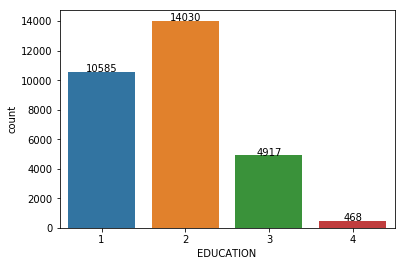

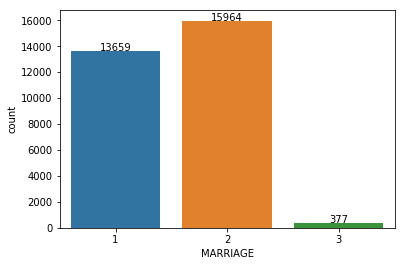

After combining the small n categories to simplify the data, we now see an easier to model and interpret set
of categorical variables.


In [16]:
cat_list_obj =('EDUCATION','MARRIAGE')#Original concept for this from Jake Drew "EducationDataNC"
cat_list_obj_len = len(cat_list_obj) # number of object attributes
cat_list_obj_len
for i in range(0,cat_list_obj_len):#Loop through object list and show each object
    ax=sns.countplot(x=cat_list_obj[i],data=cc_raw)
    for p in ax.patches:#this code modified from: 
        #https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn?noredirect=1&lq=1
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1}'.format(height),
                ha="center")     
    plt.show()
print("After combining the small n categories to simplify the data, we now see an easier to model and interpret set") 
print("of categorical variables.")

In [4]:
#Categorical values are good now, dropping ID field as it was sequential with no relation to the other data
#Data is now ready to use, so creating a new pandas object 'cc' as initial working data set.
print("We are also dropping the ID field as it has no predictive value.")
cc = cc_raw.drop(['ID'], axis =1)
#c.to_excel('cc_prelim.xlsx')

We are also dropping the ID field as it has no predictive value.


In [19]:
#Due to inconsistencies in rendering, the commented code shows the process, but the actual 
# plot will be imported from Github.
# calculate the correlation matrix
#corr_matrix  = cc.corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# plot the heatmap
#fig, ax = plt.subplots(figsize=(60,60)) 
#sns.set(font_scale=4)
#sns.heatmap(upper[to_drop], linewidths = .5, ax=ax)
#sns.heatmap(corr_matrix,linewidths = .5, cmap = "Blues", xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns)
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://raw.githubusercontent.com/JosDenney/Data_Mining/master/corr_heat_plot.png")

In general, we don't see a lot of highly correlated variables, which means we will have to reduce the dimensionality of the data set by other methods to attempt to simplify and improve the model. The only notable patterns here are the pay and bill_amt monthly variables are strongly correlated, which makes sense as the amount of bill and the amount of the payment tend to be very similar. If your bill was $500 one month, then unless you paid in full, the amount of the bill next month is liable to be strongly influenced by last month.

#### Additional Variable Creation
Here we will create bins for age to make comparisons possible by age group.


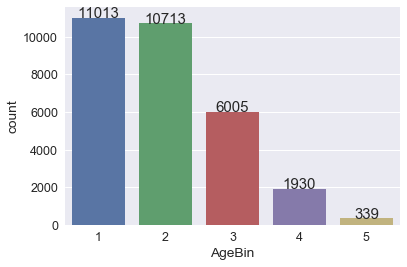

In [5]:
# Bin the ages here from: https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook/notebook
cc['AgeBin'] = pd.cut(cc['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 etc are "categories" so far and we need numbers
cc['AgeBin'] = pd.to_numeric(cc['AgeBin'])
cc.loc[(cc['AgeBin'] == 6) , 'AgeBin'] = 5
sns.set(font_scale=1.25)
ax=sns.countplot(x='AgeBin',data=cc)
#ax.set_xticklabels(label_text['20s','30s','40s','50s','60+'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1}'.format(height),
            ha="center") 

In [25]:
#make function to look at default rate by age bins
def corr_2_cols(Col1, Col2):
    res = cc.groupby([Col1, Col2]).size().unstack()
    res['% '] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res


print("Based on the results in the table below, we see a slight increase in default rates as you age.")
print("The significant increase in AgeBin5 would be worth some additional investigation. This is a small n")
print("group, so we would want to examine other datasets and consult with subject matter experts for a sanity check.")
corr_2_cols('AgeBin', 'default payment next month')

Based on the results in the table below, we see a slight increase in default rates as you age.
The significant increase in AgeBin5 would be worth some additional investigation. This is a small n
group, so we would want to examine other datasets and consult with subject matter experts for a sanity check.


default payment next month,0,1,%
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


#### Here we create variables to track the available balance each month.
This will allow us see if there is any impact from carrying a large balance on default likelihood.

In [6]:
#make %Avail Calculations
cc['%Avail_1'] = (cc.BILL_AMT1 - cc.LIMIT_BAL) /cc.LIMIT_BAL
cc['%Avail_2'] = (cc.BILL_AMT2 - cc.LIMIT_BAL) /cc.LIMIT_BAL
cc['%Avail_3'] = (cc.BILL_AMT3 - cc.LIMIT_BAL) /cc.LIMIT_BAL
cc['%Avail_4'] = (cc.BILL_AMT4 - cc.LIMIT_BAL) /cc.LIMIT_BAL
cc['%Avail_5'] = (cc.BILL_AMT5 - cc.LIMIT_BAL) /cc.LIMIT_BAL
cc['%Avail_6'] = (cc.BILL_AMT6 - cc.LIMIT_BAL) /cc.LIMIT_BAL

#### The next variable created is DLQ_3mths. This is the number of times a borrower was late in the last 3 months.
We want to see the impact of a number of late payments on predicting default here.

In [7]:
# Adding a "Dlq_3mths" column that computes the number of times the borrower was delinquent in the latest 3 months
# Three possible values: 0, 1, 2, or 3
pay0 = cc.PAY_0 >= 1
pay2 = cc.PAY_2 >= 1
pay3 = cc.PAY_3 >= 1
total_dlq = pd.concat([pay0,pay2,pay3],axis=1)
cc['DLQ_3MTHS'] = total_dlq.sum(axis=1)
#cc.to_csv('cc.csv')

[Text(0,0.5,'Percent')]

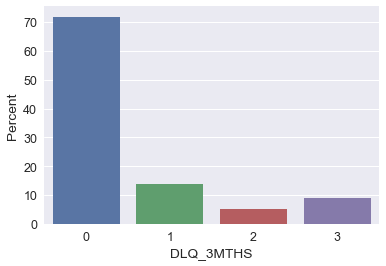

In [30]:
# Plot the percentage distribution of DLQ_3MTHS
dlq_3mths_plot = pd.DataFrame(dict(DLQ_3MTHS=np.random.poisson(4, 500)))
ax = sns.barplot(x="DLQ_3MTHS", y="DLQ_3MTHS", data=cc, estimator=lambda DLQ_3MTHS: len(DLQ_3MTHS) / len(cc) * 100)
ax.set(ylabel="Percent")

#### Our final dataset listing for our Task 1 Classification Models
This dataset is also One Hot Encoded to make them categorical variables

In [8]:
#make sex, education, and marriage categories and get ready for OHE
#int to float
cc["SEX"] = cc["SEX"].astype('category')
cc["EDUCATION"] = cc["EDUCATION"].astype('category')
cc["MARRIAGE"] = cc["MARRIAGE"].astype('category')
cc["AgeBin"] = cc['AgeBin'].astype('category')
cc["LIMIT_BAL"] = cc["LIMIT_BAL"].astype('float64')
cc["BILL_AMT1"] = cc["BILL_AMT1"].astype('float64')
cc["BILL_AMT2"] = cc["BILL_AMT2"].astype('float64')
cc["BILL_AMT3"] = cc["BILL_AMT3"].astype('float64')
cc["BILL_AMT4"] = cc["BILL_AMT4"].astype('float64')
cc["BILL_AMT5"] = cc["BILL_AMT5"].astype('float64')
cc["BILL_AMT6"] = cc["BILL_AMT6"].astype('float64')
cc["PAY_AMT1"] = cc["PAY_AMT1"].astype('float64')
cc["PAY_AMT2"] = cc["PAY_AMT2"].astype('float64')
cc["PAY_AMT3"] = cc["PAY_AMT3"].astype('float64')
cc["PAY_AMT4"] = cc["PAY_AMT4"].astype('float64')
cc["PAY_AMT5"] = cc["PAY_AMT5"].astype('float64')
cc["PAY_AMT6"] = cc["PAY_AMT6"].astype('float64')
#cc.dtypes

In [9]:
#use OHE
encoded_df = pd.get_dummies(cc)
#encoded_df.info()

In [10]:
#reorder columns
#note dependent variable name is now simply DEFAULT
column_titles = ['EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_1','MARRIAGE_2','MARRIAGE_3','SEX_1', 'SEX_2',
                 'AgeBin_1','AgeBin_2','AgeBin_3','AgeBin_4','AgeBin_5','PAY_0', 'PAY_2','PAY_3', 'DLQ_3MTHS','PAY_4', 'PAY_5', 'PAY_6',
                 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LIMIT_BAL', 'AGE', '%Avail_1', '%Avail_2', '%Avail_3', '%Avail_4',
                 '%Avail_5', '%Avail_6', 'default payment next month']

#reorder the columns
df2 = encoded_df.reindex(columns=column_titles)
df2.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 42 columns):
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
EDUCATION_4    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
SEX_1          30000 non-null uint8
SEX_2          30000 non-null uint8
AgeBin_1       30000 non-null uint8
AgeBin_2       30000 non-null uint8
AgeBin_3       30000 non-null uint8
AgeBin_4       30000 non-null uint8
AgeBin_5       30000 non-null uint8
PAY_0          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
DLQ_3MTHS      30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null float64
BILL_AMT2      30000 non-null float64
BILL_AMT3      30000 non-null float64
BILL_AMT4      30000 

## Modeling and Evaluation

Our first modeling task is to predict which customers will reach default status. In the current state, we assume there is no algorithm implemented to predict whether a customer will default or not. If we were to take a random guess with no data, we have a 22.12% chance of identifying a customer who will default. This approach is our first ‘baseline’ to beat and thus prove the value of applying data mining techniques to this data set. In other words, we need to improve upon our ‘random guess’ or ‘gut feel’ metric of approximately 22%.

It is noteworthy to mention this data set is heavily imbalanced. This represents a challenge for many classification algorithms: “Since machine learning algorithms typically optimize a reward or cost function that is computed as a sum over the training examples that it sees during fitting, the decision rule is likely going to be biased towards the majority class. In other words, the algorithm implicitly learns a model that optimizes the predictions based on the most abundant class in the data set, in order to minimize the cost or maximize the reward during training” (Python Machine Learning, 2nd ed. Sebastian Raschka and Vahid Mirjali, pg. 215).

We have several options to investigate for this analysis to deal with a class imbalance. First, we will investigate the class weight model parameter implemented in Scikit-Learn. This option allows us to “assign a larger penalty to wrong predictions on the minority class” (Python Machine Learning, 2nd ed. Sebastian Raschka and Vahid Mirjali, pg. 215). When classifiers do not allow the class imbalance option(ex: Neural Network), we will utilize SMOTE: Synthetic Minority Oversampling Technique. SMOTE generates “synthetic” training samples, which we must consider as we also think about explaining this model to business executives; our goal is to balance model performance with minimal complexity to drive business adoption.

## Metrics

Often, the default metric for classification is accuracy. However, because we have such an imbalanced data set, simply reporting accuracy would be misleading as an algorithm ‘out of the box’ applied to this data set could report an “accuracy” of >75% given the small number of actual default instances.

Our preferred metric for our classification tasks is the F1 Score. We use this as our preferred metric because F1 considers precision and recall. Precision and recall can be thought of as closely related to true positive rate and false positive rates. Because we want to minimize false positives, we need to account for precision in our models. Likewise, because we want to capture as many default loans as possible, we also need a measure of recall. We need the emphasis on both to make an actionable business/process change. It is a waste of resources and time to have a large false positive rate. Additionally, an algorithmic approach to solving this problem is only useful if we can predict the default loans. These two metrics are combined in the F1 score, which is calculated as: 

2 X (Precision*Recall)/(Precision+Recall)


We have emphasized this metric throughout the analysis. First, our grid search best score is set to report best F1 Score. Second, our summary reports also highlight F1 scores of each model. 


## Validation Methods

For our classification task, we will employ a train/test split, with 80% of our data set dedicated to training and 20% dedicated to testing. Test data is our best indicator of how our models will perform in a production environment. While one criticism of a train/test split is, the variance introduced by each iteration having different instances contained in train/test, we will overcome this challenge in our model training phase. We will implement 10-fold cross-validation. This is done to reduce variance so that training is not simply limited to one set. This implementation can be found in the GridSearch object that also seeks to find the best parameters. By using both cross-validation and a train/test split, we will produce a validated, robust model.

## Function For Visuals

Here were are creating a function to create a standard method for our visuals for the rest of the project.

In [11]:
#make a data frame we will later need to plot variable importance
graphing_df = df2.drop('DEFAULT', axis = 1)

In [41]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#source sklearn documentation

## Classification Task 1: Predicting Default Status


### Method 1: Logistic Regression

In [49]:
#create X and y variables for modeling
X = df2.drop('DEFAULT', axis = 1).values
y = df2['DEFAULT'].values
print("The Shape of the data frame after adding dummy variables is", df2.shape)

The Shape of the data frame after adding dummy variables is (30000, 42)


In [50]:
#create a train/test split of 80% of instances allocated for training and 20% allocated for test
#random state set for reproducibility
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

#scale our X values
#scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 

# find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

#set up parameter grid search for C variable
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
log_scorer = make_scorer(f1_score, pos_label = 1)
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 2,10,1000] }
logreg = LogisticRegression(random_state = 0, class_weight = 'balanced')
logclf = GridSearchCV(logreg, log_param_grid, scoring = log_scorer, cv = 10)

#fit model
logclf.fit(X_train_scaled,y_train)

#Predict using Test data
#also grab train predictions
log_grid_model = logclf.best_estimator_
log_grid_model.fit(X_train_scaled, y_train)
log_test = log_grid_model.predict(X_test_scaled)

In [51]:
#print the best paramter of C found and best score
print(logclf.best_score_)
print(logclf.best_params_)

0.523285309903
{'C': 0.01}


To optimize our classifer, we implemented a grid search cross-validation, which resulted in an 'C' parameter of 0.01 and a best score of 0.523.

In [52]:
#take a look at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,log_test))

             precision    recall  f1-score   support

          0       0.88      0.82      0.85      4687
          1       0.48      0.59      0.53      1313

avg / total       0.79      0.77      0.78      6000



The classifcation report evaluates the individual precision, recall, and f1-scores for each indvidual response value as well as the average scores for the binary values collectively.
Overall, the model is better at classifying non-defaulted loans as opposed to defaulted. This is supported by the precision, recall, and f1-scores ranging from 0.82-0.88 for true non-defaults and 0.48-0.59 for true defaults.
Lastly, the trade off curve statistics are exemplary with a range of 0.77-0.79, which measures the trade off associated with an unbalanced data set containing a higher proportion of non-defaults. 

## Visuals and Analysis - Logistic Regression

Average precision-recall score: 0.37


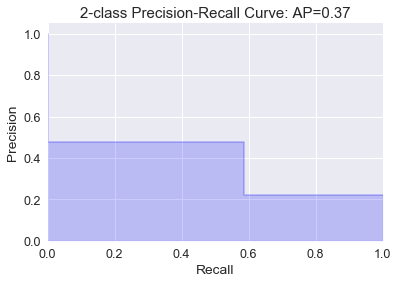

In [53]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
average_precision_log = average_precision_score(y_test, log_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_log))
precision, recall, _ = precision_recall_curve(y_test, log_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_log))
plt.show()

#source: scikitlearn documentation

In [54]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, log_test))

0.702758647137


The ROC curve generated a score of 0.70, which can be considered an 'above average' or 'fair' classification model.

Confusion matrix
[[3839  848]
 [ 543  770]]


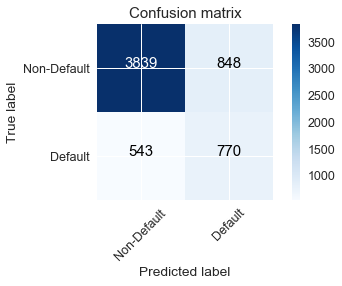

In [55]:
# Compute confusion matrix
from sklearn import metrics as mt
log_conf = mt.confusion_matrix(y_test,log_test)

class_names = ['Non-Default', 'Default']
plot_confusion_matrix(log_conf, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

Based on the confusion matrix, the accuracy of our classifer is [(770 + 3839) / 6000] = 77%, which infers a misclassifed percentage of 23%.

## Advantages of Model - Logistic Regression

A logistic regression model works well with features that are mostly linear and with binary classification problems that can be linearly separated. In cases where the features do not exhibit linearity, data transformations such as log or polynomial can transform features to make data easier for the equation to interpret/train. In addition, logistic regression is generally robust to noise and outliers in the data and allows for custom selection techniques, such as lasso or step-wise selection. Another benefit of logistic regression is that the output can be interpreted as probabilities or odds ratios, depending on the question of interest. 

Overall, the Logistic Regression model demonstrated above average prediction and accuracy measurements. The model achieved very high marks in its ability to classify non-defaults, as evidenced by an F1 score of 0.85. A specificity statistic of 0.82 highlights the model's capacity to predict true non-defaults.

For the defaulted loans, the model did not achieve the same high scores as the non-defaulted portfolio. With that being said, the model demonstrated better recall, i.e., when there is a default, how often is it classified as such, than precision.  The model produced a recall statistic of 0.59 and a precision of 0.53, which resolves to an F1 score of 0.53. Recall is most crucial for these types models as banks and other lending institutions invest significant loss mitigation resources to delinquent borrowers who have a higher probability of default. 

Total accuracy of the model may be measured by the total area under the ROC curve. A total area of 1 would correspond to a perfect test while an area of 0.5 would be a failing grade. For this particular model, the area under the curve was 0.70, which is fair.

A weakness of the accuracy statistic is that it ignores the cost of misclassification. To address this, we will build a cost matrix that calculates the total cost associated with each model and assign a penalty for misclassified predictions and a credit for correct predictions. To maintain consistency throughout the project, we will use the following cost methodology for all models. Our methodology assumes that a lower score indicates a better model. 
* True Positives  -> Multiply by -1
* False Positives -> Multiply by 10
* False Negatives -> Multiply by 15
* True Negatives  -> Multiply by -1

Using the confusion matrix above, we can calculate a total cost score from our Logistic Regression model. <br>
**Cost Score = (3839)(-1) + (848)(10) + (543)(15) + (870)(-1) = 11916**

## Feature Importance - Logistic Regression

In [57]:
# sort these attributes and print out model coefficients
zip_vars = zip(log_grid_model.coef_.T, graphing_df) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of',coef[0]) # now print them out

PAY_3 has weight of -0.215268231546
PAY_2 has weight of -0.213221011516
LIMIT_BAL has weight of -0.212529748897
PAY_AMT2 has weight of -0.173725025283
PAY_AMT1 has weight of -0.127039754709
%Avail_1 has weight of -0.111731875413
EDUCATION_4 has weight of -0.107128827485
BILL_AMT6 has weight of -0.0634775484415
%Avail_5 has weight of -0.0624436451587
MARRIAGE_2 has weight of -0.038904852804
SEX_2 has weight of -0.0366897274477
PAY_AMT4 has weight of -0.0366842486872
PAY_AMT6 has weight of -0.0358773082299
%Avail_3 has weight of -0.028366400161
%Avail_4 has weight of -0.0256274343629
BILL_AMT4 has weight of -0.021240970071
PAY_AMT5 has weight of -0.0139160886963
PAY_AMT3 has weight of -0.013697220719
MARRIAGE_3 has weight of -0.0075078473015
AgeBin_2 has weight of -0.00569714592234
AgeBin_1 has weight of -0.00433781251453
AgeBin_3 has weight of -0.00171248549746
BILL_AMT5 has weight of -0.000210016942363
EDUCATION_1 has weight of 0.00123034163354
EDUCATION_3 has weight of 0.0026629236026

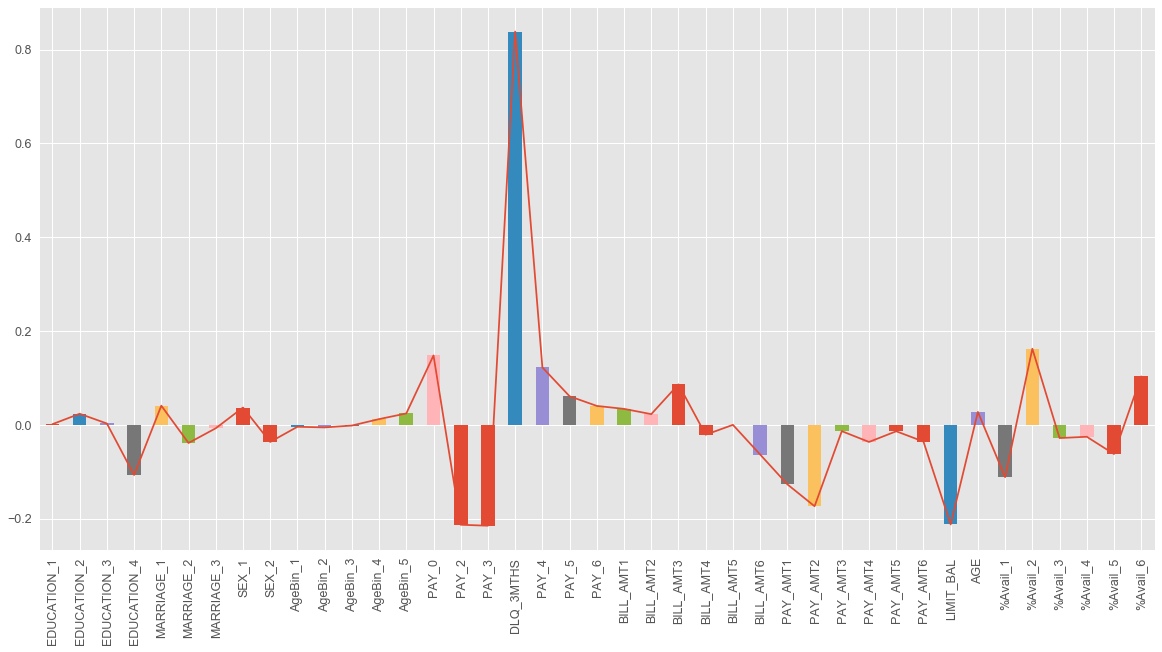

In [58]:
#Plot the coefficients that are significant in terms of weight. 
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(log_grid_model.coef_[0],index=graphing_df.columns)
weights.plot(kind='bar')
weights.plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

To get the odds ratios, we will exponentiate the logit coefficient values. For simplicity, we will focus on the coefficients that have a weight of >= 0.1. The odds ratios for the 12 'significant' variables are as follows. <br> PAY_3: 0.81 <br> PAY_2: 0.81 <br> LIMIT_BAL: 0.81 <br> PAY_AMT2: 0.84 <br> PAY_AMT1: 0.88 <br> %Avail_1: 0.89 <br> EDUCATION_4: 0.90 <br> %Avail_6: 1.11 <br> PAY_4: 1.13 <br> PAY_0L 1.16 <br> %Avail_2: 1.18 <br> DLQ_3MTHS: 2.31

The most significant variable for the model is 'DLQ_3MTHS', which represents the number of times a borrower was delinquent in 
the latest 3 months. From this, we can imply that the odds of default increase by 2.31 for every one-unit increase in the delinquency count, holding all other explanatory variables constant. 

Additionally, individuals devoid of a high school degree, i.e. 'EDUCATION_4' column, the odds of default increase by 0.9. Intuitively, this makes sense given that on average, individuals with no high school diploma make less income than their counterparts with more formal education.

Other variables that had a significant impact into the model predictions included payment amount, payment status, and percent of available balance. It is worth noting that the more recent loan statuses held more weight than the older (5-6 months) statuses.

### Method 2: Support Vector Machine

In [77]:
#use a support vector classifier
#grid search and fit
from sklearn.svm import SVC
svm_scorer = make_scorer(f1_score, pos_label = 1)

svm_param_grid = {'C': [0.001, 0.01, 1] }
svm = SVC(random_state = 0, class_weight = 'balanced')

svmclf = GridSearchCV(svm, svm_param_grid, scoring=svm_scorer, cv=10, n_jobs=-1)
svmclf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [78]:
#assign found best estimator and refit
#predict in third step
svm_grid_model = svmclf.best_estimator_
svm_grid_model.fit(X_train_scaled, y_train)
svm_test = svm_grid_model.predict(X_test_scaled)

In [79]:
#print the best paramter of C found and best score
print(svmclf.best_score_)
print(svmclf.best_params_)

0.5258515224997652
{'C': 1}


To optimize our classifer, we implemented a grid search cross-validation, which resulted in an 'C' parameter of 1 and a best score of 0.526

In [80]:
#take a look at the classification report
print(classification_report(y_test,svm_test))

             precision    recall  f1-score   support

          0       0.88      0.81      0.84      4687
          1       0.47      0.60      0.52      1313

avg / total       0.79      0.76      0.77      6000




Similar to the logistic regression model, the SVM model is better at classifying non-defaulted loans as opposed to defaulted. The precision, recall, and f1-scores range from 0.81-0.88 for non-defaults and from 0.47-0.60 for true defaults. The average/total scores are uplifted by the higher proportion of non-defaulted loans to defaulted loans, and range from 0.76-0.79.

## Visuals and Analysis - Nonlinear SVM

Average precision-recall score: 0.58


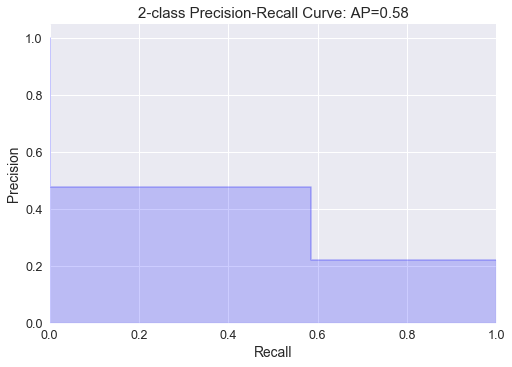

In [37]:
average_precision_rbf = average_precision_score(y_test, svm_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_rbf))
precision, recall, _ = precision_recall_curve(y_test, log_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_rbf))
plt.show()

#source: scikitlearn documentation

In [40]:
print(roc_auc_score(y_test, svm_test))

0.7028775935642833



The ROC curve generated a score of 0.70, which can be considered an 'above average' or 'fair' classification model.

Confusion matrix
[[3783  904]
 [ 527  786]]


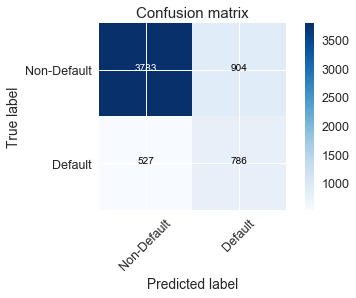

In [55]:
# Compute confusion matrix
svm_conf = mt.confusion_matrix(y_test,svm_test)
class_names = ['Non-Default', 'Default']
plot_confusion_matrix(svm_conf, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()


The confusion matrix indicates an accuracy of 76% [(786 + 3783) / 6000], which infers a misclassifed percentage of 24%.

## Advantages of Model - Nonlinear SVM

In cases where the solution is not linearly separable, a nonlinear support vector machine which specifies a non-linear kernel could be advantageous over a logistic regression model. Another advantage of SMV models is that they work well with high dimensions and can 'drill down' the results into smaller, less complicated results. 

The Nonlinear SVM model generated similar classification metrics to that of the Logistic Regression model. It achieved high marks in its ability to classify non-defaults, as evidenced by an F1 score of 0.84. Its specificity measure of 0.81 demonstrates the model's ability to accurately capture non-defaults.

The model struggled to classify the defaulted loans compared to non-defaults. However, given the high importance placed on reducing Type I errors, the model was able to produce better recall than precision - 0.60 versus 0.47. 

Based on the ROC curve, the area under the curve was 0.70, which is fair.

As mentioned in the logistic regression model summary, the goal is to compare the cost associated with each model by calculating a cost matrix. Below is the total cost score from the Nonlinear SVM model. <br> 
**Cost Score = (3783)(-1) + (904)(10) + (527)(15) + (786)(-1) = 12376**

### Comparison of all Models

**Precision Overall (higher=better)** <br>
Logistic = 0.79; SVM Nonlinear = 0.79 <br>
Advantage: Tie

**Recall Overall (higher=better)** <br>
Logistic = 0.78; SVM Nonlinear = 0.76 <br>
Advantage: Logistic

**F1 Overall Score (higher=better)** <br>
Logistic = 0.78; SVM Nonlinear = 0.77 <br>
Advantage: Logistic

**Cost Score (lower=better)** <br>
Logistic = 11916 ; SVM Nonlinear = 12376 <br>
Advantage: Logistic

From our two models, the Logistic Regression model is preferrable due to higher overall Recall and F1 Scores and a lower cost score associated with misclassication penalties. 

## Feature Importance - Nonlinear SVM

In [56]:
#PRINT SUPPORT VECTORS
print(svm_grid_model.support_vectors_.shape)
print(svm_grid_model.support_.shape)
print(svm_grid_model.n_support_ )

(15625, 41)
(15625,)
[11980  3645]


In [84]:
#recreate train/test to get support vectors
from sklearn.model_selection import ShuffleSplit

if 'DEFAULT' in X:
    y_nonlin_svm = X['DEFAULT'].values
    del X['DEFAULT'] 
    X_nonlin_svm = X.values
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [107]:
#loop on train/test indices
for train_indices, test_indices in cv_object.split(X,y): 
    X_train_nonlin = X[train_indices]
    y_train_nonlin = y[train_indices]
    
    X_test_nonlin = X[test_indices]
    y_test_nonlin = y[test_indices]


X_train_scaled_nonlin_svc = scl_obj.transform(X_train_scaled)
X_test_scaled_nonlin_svc = scl_obj.transform(X_test_scaled)

In [108]:
# Split data and select certain variables for SVM visualization
df_non_lin_svm= df2[['DEFAULT','PAY_3','PAY_2','LIMIT_BAL','PAY_AMT2','PAY_AMT1','%Avail_1','EDUCATION_4',
          '%Avail_6','PAY_4','PAY_0','%Avail_2','DLQ_3MTHS']]


svm_nonlin_test = df_non_lin_svm.iloc[train_indices]
svm_nonlin_support = svm_nonlin_test.iloc[svm_grid_model.support_,:]

svm_nonlin_support['DEFAULT'] = y[svm_grid_model.support_]
svm_nonlin_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15625 entries, 23034 to 11216
Data columns (total 13 columns):
DEFAULT        15625 non-null int64
PAY_3          15625 non-null int64
PAY_2          15625 non-null int64
LIMIT_BAL      15625 non-null float64
PAY_AMT2       15625 non-null float64
PAY_AMT1       15625 non-null float64
%Avail_1       15625 non-null float64
EDUCATION_4    15625 non-null uint8
%Avail_6       15625 non-null float64
PAY_4          15625 non-null int64
PAY_0          15625 non-null int64
%Avail_2       15625 non-null float64
DLQ_3MTHS      15625 non-null int64
dtypes: float64(6), int64(6), uint8(1)
memory usage: 1.6 MB


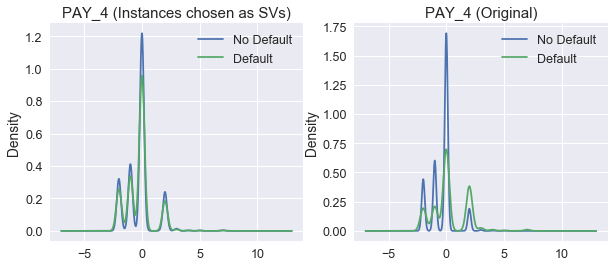

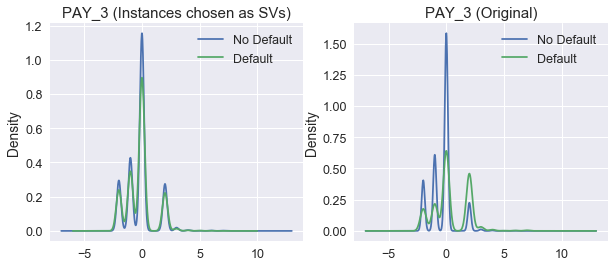

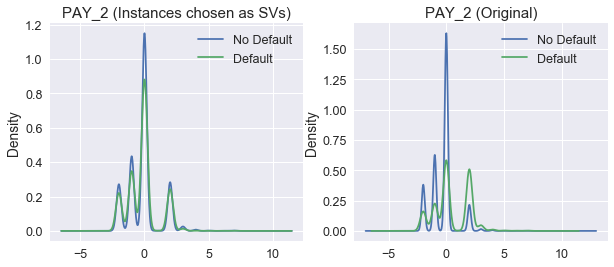

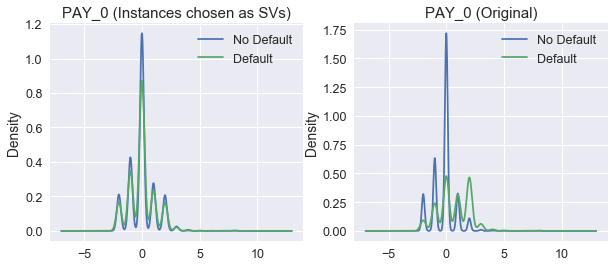

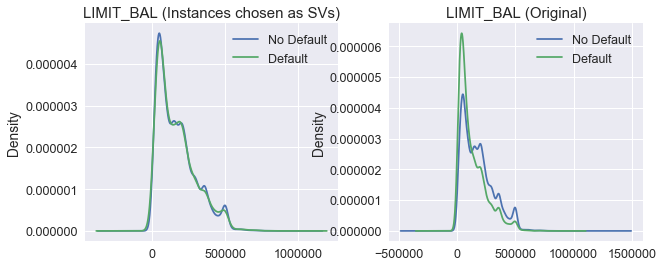

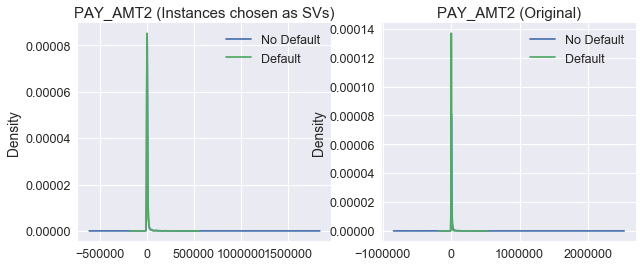

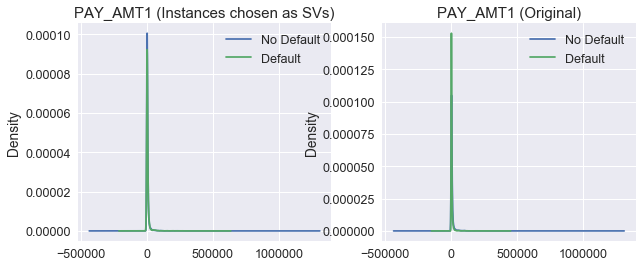

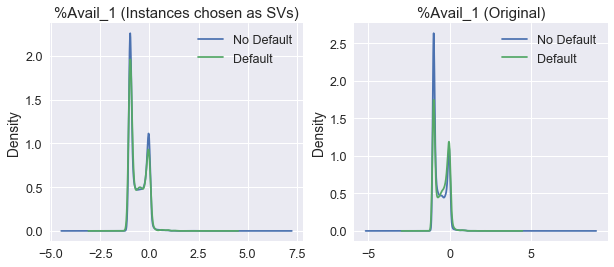

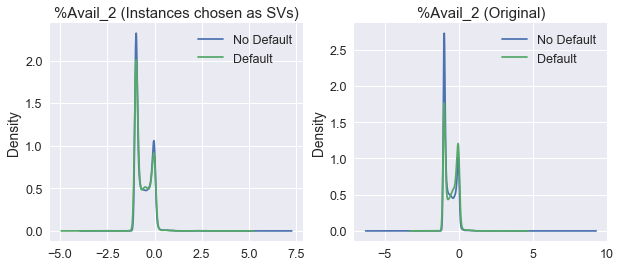

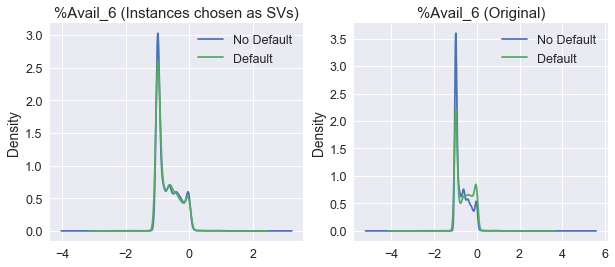

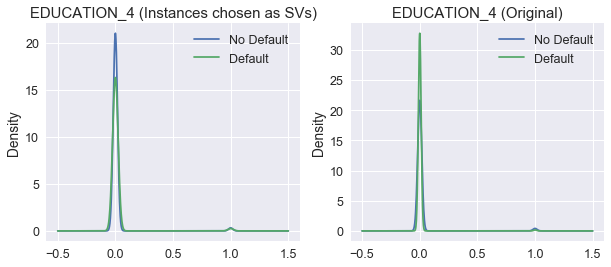

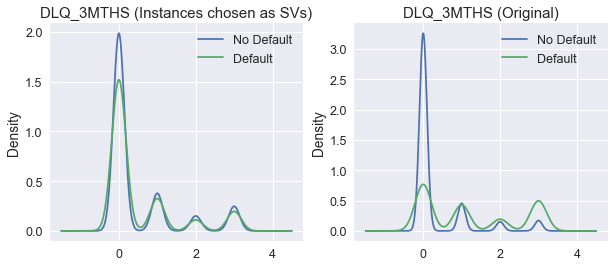

In [100]:
#plot the insances chosen as support vectors
from pandas.tools.plotting import boxplot

df_grouped_support_nonlin_svm = svm_nonlin_support.groupby(['DEFAULT'])
df_grouped_nonlin_svm = df_non_lin_svm.groupby(['DEFAULT'])

vars_to_plot = ['PAY_4','PAY_3','PAY_2', 'PAY_0','LIMIT_BAL','PAY_AMT2','PAY_AMT1','%Avail_1',
          '%Avail_2','%Avail_6','EDUCATION_4','DLQ_3MTHS']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support_nonlin_svm[v].plot.kde() 
    plt.legend(['No Default','Default'])
    plt.title(v+' (Instances chosen as SVs)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped_nonlin_svm[v].plot.kde() 
    plt.legend(['No Default','Default'])
    plt.title(v+' (Original)')

To inspect the shape of the suppor vectors, we trained the model and found 15625 instances that form the support vectors. To reduce the number of variables, we chose to plot the following variables for before/after comparisons:

PAY_4 <br>
PAY_3 <br>
PAY_2 <br>
PAY_0 <br>
LIMIT_BAL <br>
PAY_AMT2 <br>
PAY_AMT1 <br>
%Avail_1 <br>
%Avail_2 <br>
%Avail_6 <br>
EDUCATION_4 <br>
DLQ_3MTHS

For the payment status variables (PAY_4, PAY_5, PAY_2, PAY_0), we observe more variance from the original to chosen instances in the defaulted portfolio as opposed to the non-defaulted portfolio. We see a noticeable spread particulary in the high frequency bins. This is reflected in higher performance metrics noted from the confusion matrix for non-defaulted classifers.

For the continuous variables (PAY_AMT2, PAY_AMT1, %Avail_1, %Avail_2, %Avail_6), there is little variance from the orginal data to the chosen support vectors.

If we observe LIMIT_BAL and DLQ_3MTHS, we notice a visible spread between defaults and non-defaults from the original data. From the support vectors, however, the margin is closed when the support vectors are chosen.

### Mehod 2.B: Support Vector Machine Linear

In [110]:
#make a linear model to see how it compares to RBF kernel
linsvm = SVC(kernel = 'linear', random_state = 0, class_weight = 'balanced')

linsvmclf = GridSearchCV(linsvm, svm_param_grid, scoring=svm_scorer, cv=10, n_jobs=-1)

linsvmclf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [111]:
#assign best estimator from grid search and refit
#predict in third step
linsvm_grid_model = linsvmclf.best_estimator_
linsvm_grid_model.fit(X_train_scaled, y_train)
linsvm_test = linsvm_grid_model.predict(X_test_scaled)

In [112]:
#print the best paramter of C found and best score
print(linsvmclf.best_score_)
print(linsvmclf.best_params_)

0.5107235506697462
{'C': 1}


To optimize our classifer, we implemented a grid search cross-validation, which resulted in an 'C' parameter of 1 and a best score of 0.511

In [113]:
#make confusion matrix for linear SVC
linsvm_conf = mt.confusion_matrix(y_test,linsvm_test)
print(linsvm_conf)

[[3992  695]
 [ 631  682]]


In [114]:
#take a look at the classification report
print(classification_report(y_test,linsvm_test))

             precision    recall  f1-score   support

          0       0.86      0.85      0.86      4687
          1       0.50      0.52      0.51      1313

avg / total       0.78      0.78      0.78      6000



The Linear SVM model is classifying the non-defaulted loans better than the defaulted loans. The precision, recall, and f1-scores range from 0.85-0.86 for non-defaults and from 0.50-0.52 for true defaults. The average/total statistics are all a consistent 0.78.

## Visuals and Analysis - Linear SVM

Average precision-recall score: 0.56


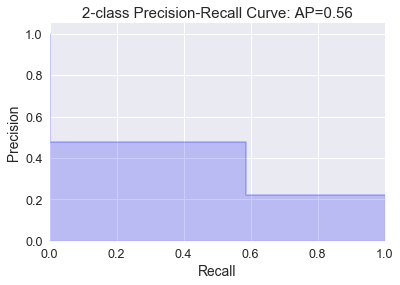

In [115]:
average_precision_svmlin = average_precision_score(y_test, linsvm_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svmlin))
precision, recall, _ = precision_recall_curve(y_test, log_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_svmlin))
plt.show()

#source: scikitlearn documentation

In [116]:
#calculate the ROC_AUC score
print(roc_auc_score(y_test, linsvm_test))

0.6855693447108083


The ROC curve generated a score of 0.685, which would be considered a 'poor' classification model

Confusion matrix
[[3992  695]
 [ 631  682]]


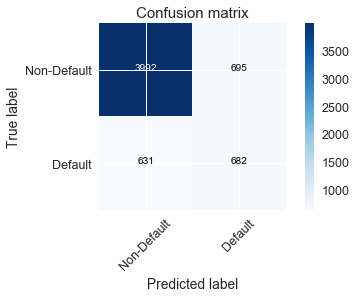

In [117]:
# Compute confusion matrix
class_names = ['Non-Default', 'Default']
plot_confusion_matrix(linsvm_conf, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

The confusion matrix indicates an accuracy of 78% [(682 + 3992) / 6000], which infers a misclassifed percentage of 22%.

## Advantages of Model - Linear SVM

The Linear SVM model generated similar classification metrics to that of the Logistic Regression and Nonlinear SVM models. The precision and recall statistics did not differ significantly like they did with the other models. This could be important to statisticians and/or analysts that place a high importance to both stats. 

Like the other models, the Linear SVM performed better in classifying the defaulted loans compared to non-defaults. The F1 score for non-defaults was 0.86 and 0.51 for defaults. As mentionined above, the model had similar precision and recall scores between the two classification variables. 

The area under the curve was 0.685, which could be considered a 'poor' to 'fair' classifier.

Below is the computed total cost score for the Linear SVM based on the classifiation table. <br>
**Cost Score = (3992)(-1) + (695)(10) + (631)(15) + (682)(-1) = 11741**

### Comparison of all Models

**Precision Overall (higher=better)** <br>
Logistic = 0.79; SVM Nonlinear = 0.79; SVM Linear = 0.78;  <br>
Advantage: Logistic and SVM Nonlinear

**Recall Overall (higher=better)** <br>
Logistic = 0.77; SVM Nonlinear = 0.76; SVM Linear = 0.78; <br>
Advantage: SVM Linear

** F1 Score Overall (higher=better)** <br>
Logistic = 0.78; SVM Nonlinear = 0.77; SVM Linear = 0.78; <br>
Advantage: Logistic and SVM Linear

** Cost Score (lower=better)** <br>
Logistic = 11916; SVM Nonlinear = 12376; SVM Linear = 11741; <br>
Advantage: SVM Linear

From our three models, the SVM Linear is the preferred model due to the best combination of Precision, Recall, F1, and cost scores.

## Feature Importance - Linear SVM

In [118]:
# sort these attributes and print out model coefficients
zip_vars = zip(linsvm_grid_model.coef_.T, graphing_df) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

PAY_2 has weight of -0.34285118222884936
PAY_3 has weight of -0.21284850055003357
%Avail_1 has weight of -0.04806555993018824
BILL_AMT2 has weight of -0.03084010505071566
PAY_AMT2 has weight of -0.02624431964497681
%Avail_3 has weight of -0.011893370425426042
BILL_AMT6 has weight of -0.010350200615651506
PAY_AMT1 has weight of -0.01014499093468657
%Avail_5 has weight of -0.009506112746035189
%Avail_4 has weight of -0.006842987167871684
BILL_AMT4 has weight of -0.003812417986179817
EDUCATION_4 has weight of -0.0035820713785335023
LIMIT_BAL has weight of -0.0030117297921611053
SEX_2 has weight of -0.0012374052214974007
PAY_AMT4 has weight of -0.001101737566920391
MARRIAGE_2 has weight of -0.0008409574625192207
PAY_AMT6 has weight of -0.0005810758988546438
AgeBin_3 has weight of -0.0004980801797502821
MARRIAGE_3 has weight of -0.00022033885824779276
AgeBin_4 has weight of -0.00018507019690616744
AgeBin_2 has weight of -0.00012091238905620472
AgeBin_5 has weight of -8.758577230894016e-05
E

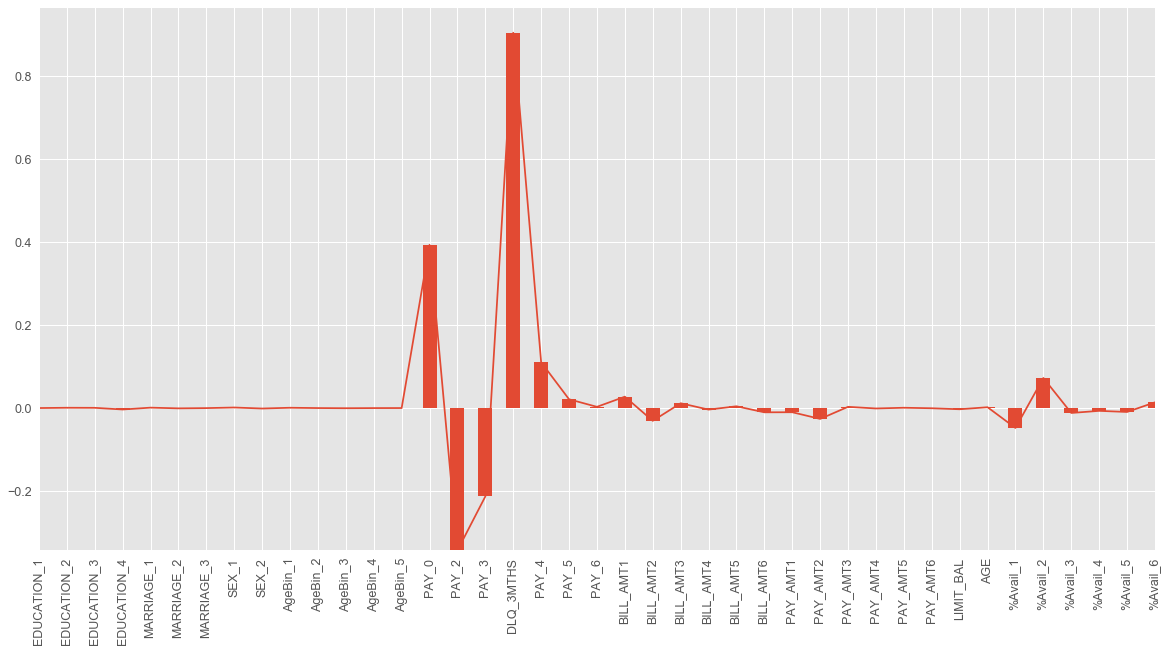

In [120]:
#Plot the coefficients
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(linsvm_grid_model.coef_[0],index=graphing_df.columns)
weights.plot(kind='bar')
weights.plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

The most significant variables for the model were found in the four payment status variables (PAY_2, PAY_3, PAY_4, PAY_0) and the DLQ_3MTHS variable. This is consistent with the Logistic Regression model in terms of the weight applied to the model projections. 

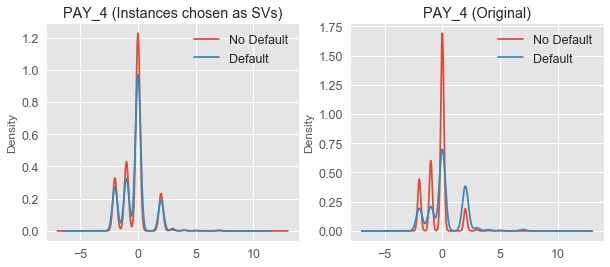

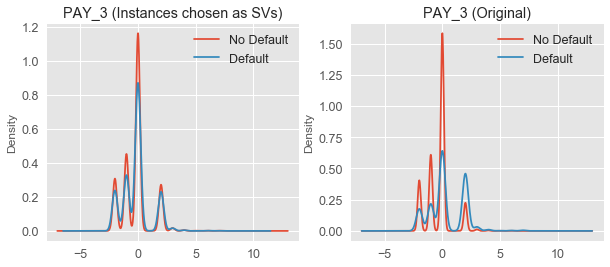

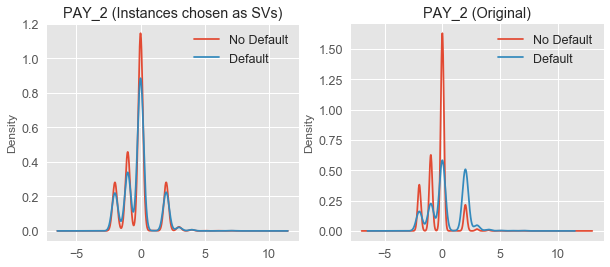

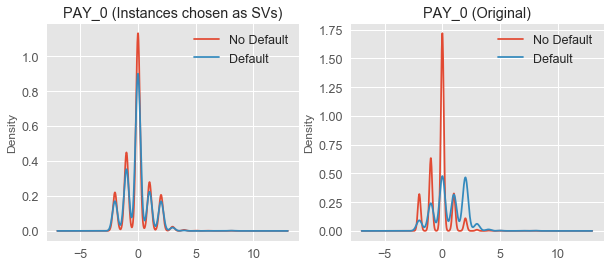

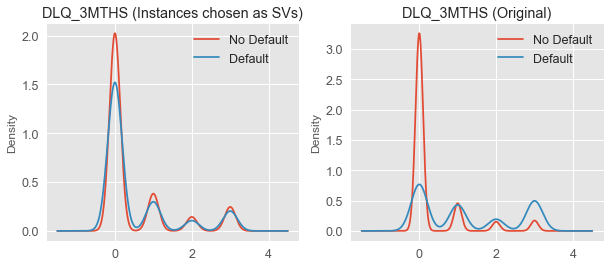

In [125]:
# Generate Support Vectors
from sklearn.model_selection import ShuffleSplit

if 'DEFAULT' in X:
    y_lin_svm = X['DEFAULT'].values
    del X['DEFAULT'] 
    X_lin_svm = X.values
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)


for train_indices, test_indices in cv_object.split(X,y): 
    X_train_lin = X[train_indices]
    y_train_lin = y[train_indices]
    
    X_test_lin = X[test_indices]
    y_test_lin = y[test_indices]


X_train_scaled_lin_svc = scl_obj.transform(X_train_scaled)
X_test_scaled_lin_svc = scl_obj.transform(X_test_scaled)

# Split data and select certain variables for SVM visualization
df_lin_svm= df2[['DEFAULT','PAY_3','PAY_2','PAY_4','PAY_0','DLQ_3MTHS']]


svm_lin_test = df_lin_svm.iloc[train_indices]
svm_lin_support = svm_lin_test.iloc[linsvm_grid_model.support_,:]

svm_lin_support['DEFAULT'] = y[linsvm_grid_model.support_]

from pandas.tools.plotting import boxplot

df_grouped_support_lin_svm = svm_lin_support.groupby(['DEFAULT'])
df_grouped_lin_svm = df_lin_svm.groupby(['DEFAULT'])

vars_to_plot = ['PAY_4','PAY_3','PAY_2','PAY_0','DLQ_3MTHS']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support_lin_svm[v].plot.kde() 
    plt.legend(['No Default','Default'])
    plt.title(v+' (Instances chosen as SVs)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped_lin_svm[v].plot.kde() 
    plt.legend(['No Default','Default'])
    plt.title(v+' (Original)')

For simplicity, we targeted the PAY_4, PAY_3, PAY_2, PAY_0, AND DLQ_3MTHS variables since these held the highest weights out of all the explanatory variables.

For all variables, we notice a big difference between defaults and non-defaults from the original data. From the support vectors, however, the gap is closed when the support vectors are chosen.

### Method 3: Random Forest

In [30]:
#set up model for Grid Search using scoring function and parameter grid 
rf_scorer = make_scorer(f1_score, pos_label = 1)

rf_param_grid = param_grid = { 
    'n_estimators': [10,20, 50, 100, 150, 200, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5,8,10,12],
    'criterion' :['gini', 'entropy']}

#import RFC
#GridSearch and train
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

rfclf = GridSearchCV(rf, rf_param_grid, scoring = rf_scorer, cv = 10)
rfclf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 150, 200, 250], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 8, 10, 12], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [31]:
#assign best estimator and fit again
#predict in thrid step
rf_grid_model = rfclf.best_estimator_
rf_grid_model.fit(X_train_scaled, y_train)
rf_test = rf_grid_model.predict(X_test_scaled)

In [32]:
#print the best paramters found and best score
print(rfclf.best_score_)
print(rfclf.best_params_)

0.5465899322836518
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 250}


In [35]:
#print confusion matrix
rf_conf = mt.confusion_matrix(y_test,rf_test)
print(rf_conf)

[[3942  745]
 [ 569  744]]


The accuracy of our classifer is [(740 + 3942) / 6000] = 78%, which infers a misclassifed percentage of 22%.

In [38]:
print(classification_report(y_test,rf_test))

             precision    recall  f1-score   support

          0       0.87      0.84      0.86      4687
          1       0.50      0.57      0.53      1313

avg / total       0.79      0.78      0.79      6000



The Random Forest model classified the non-defaulted loans better than defaults. This is supported by the precision, recall, and f1-scores ranging from 0.84-0.87 for non-defaults and 0.50-0.57 for defaults.

## Visuals and Analysis - Random Forest

Average precision-recall score: 0.58


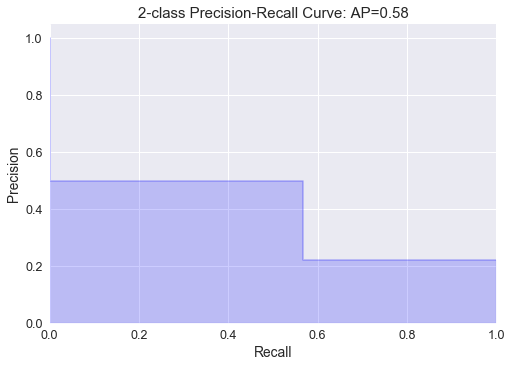

In [39]:
average_precision_rf = average_precision_score(y_test, rf_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_rf))
precision, recall, _ = precision_recall_curve(y_test, rf_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_rf))
plt.show()

#source: scikitlearn documentation

In [42]:
#print ROC_AUC score
print(roc_auc_score(y_test, rf_test))

0.7038454957409217


The area under the ROC curve is 0.704, which is considered a 'fair' classification model.

Confusion matrix
[[3942  745]
 [ 569  744]]


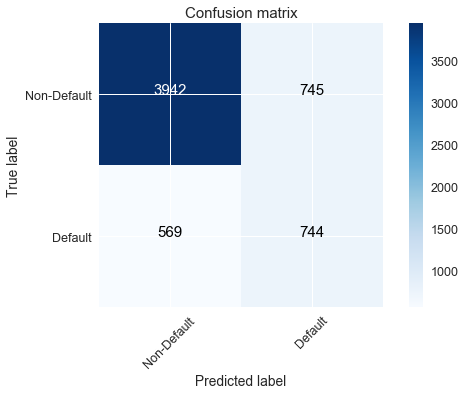

In [43]:
# Compute confusion matrix
class_names = ['Non-Default', 'Default']
plot_confusion_matrix(rf_conf, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

## Advantages of Model - Random Forest

A random forest is a decision tree based model that has distinguishable differences between logistic regression. Random forest generators do not assume linearity features or even variables that interact linearly. Random forest models are capable of handling binary features from the data, due to the fact that the model is based on the combination of decision trees. Lastly, similar to support vector machine models, random forest models perform well in high dimensions to the bagging/boosting associated with the algorithms.

The Random Forest had analogous classification statistics to the previous models. 

As observed in the previous models, the Random Forest generation was significantly better at classifying the defaulted loans versus the non-defaults. The model was relatively strong in the recall statistic compared to the other models. 

The area under the curve was 0.704, which is on par with the other models and would generally be considered a 'fair' classifier by qualified statisticians. 

The computed cost score associated with the Random Forest classifiation table is as follows. <br>
**Cost Score = (3942)(-1) + (745)(10) + (569)(15) + (744)(-1) = 11299**


### Comparison of all Models

**Precision Overall (higher=better)** <br>
Logistic = 0.79; SVM Nonlinear = 0.79; SVM Linear = 0.78; Random Forest = 0.79  <br>
Advantage: Logistic, SVM Nonlinear, and Random Forest

**Recall Overall (higher=better)** <br>
Logistic = 0.77; SVM Nonlinear = 0.76; SVM Linear = 0.78; Random Forest = 0.78 <br>
Advantage: SVM Linear and Random Forest

** F1 Score Overall (higher=better)** <br>
Logistic = 0.78; SVM Nonlinear = 0.77; SVM Linear = 0.78; Random Forest = 0.79 <br>
Advantage: Random Forest

** Cost Score (lower=better)** <br>
Logistic = 11916; SVM Nonlinear = 12376; SVM Linear = 11741; Random Forest = 11299 <br>
Advantage: Random Forest

The Random Forest model has sole advantage of best overall F1 score and lowest Cost score, and is tied for first for Precision and Recall. 

## Feature Importance - Random Forest

In [47]:
# sort these attributes and print out model coefficients
zip_vars = zip(rf_grid_model.feature_importances_.T, graphing_df) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

MARRIAGE_3 has weight of 0.0006320872084615785
AgeBin_5 has weight of 0.00083438855732195
AgeBin_4 has weight of 0.001285449881878912
AgeBin_1 has weight of 0.0018968665793729713
AgeBin_3 has weight of 0.0019229272840151712
AgeBin_2 has weight of 0.0020666207907196897
EDUCATION_4 has weight of 0.00209723528422632
EDUCATION_3 has weight of 0.002157179243012005
MARRIAGE_2 has weight of 0.0025113007623556493
SEX_2 has weight of 0.002655682468672416
EDUCATION_2 has weight of 0.0027191327318174968
SEX_1 has weight of 0.0027221226364844324
MARRIAGE_1 has weight of 0.002790362666621572
EDUCATION_1 has weight of 0.0029252469045150395
AGE has weight of 0.017263543050794174
BILL_AMT6 has weight of 0.01851346484320172
PAY_AMT5 has weight of 0.019897470016061305
BILL_AMT4 has weight of 0.02129006440183802
BILL_AMT5 has weight of 0.021308152296101727
BILL_AMT3 has weight of 0.022082810103320253
PAY_AMT6 has weight of 0.022572652107456032
PAY_6 has weight of 0.023410176911651245
%Avail_4 has weight 

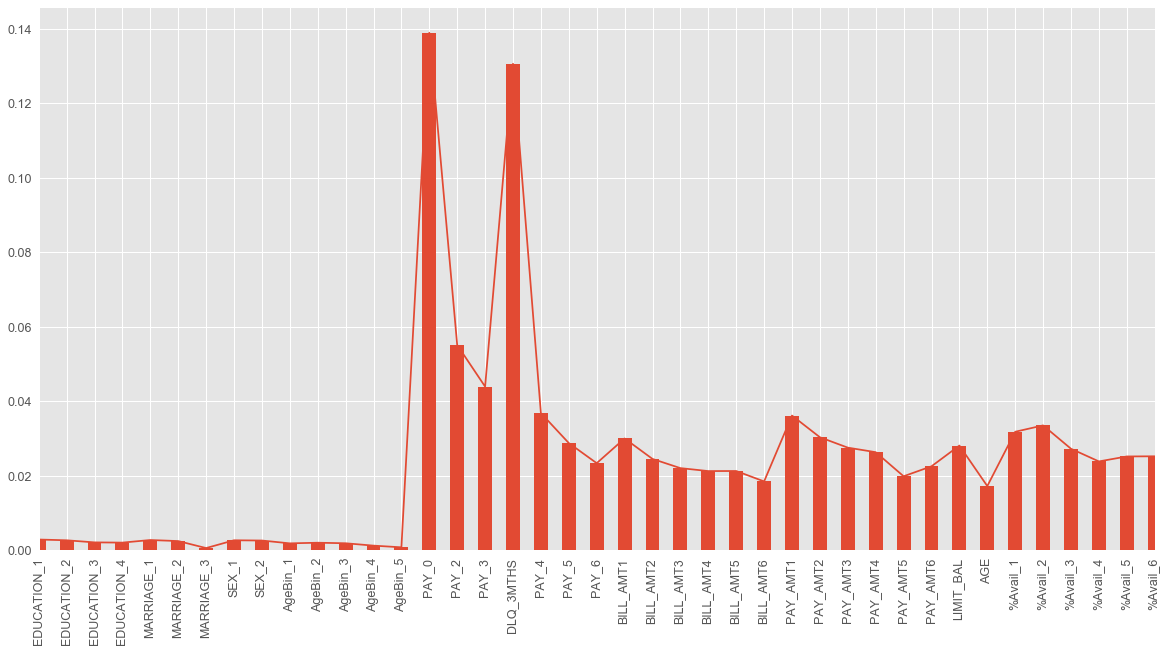

In [48]:
#Plot the coefficients
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(rf_grid_model.feature_importances_,index=graphing_df.columns)
weights.plot(kind='bar')
weights.plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

The two variables with the highest weights were found in the PAY_0 and DLQ_3MTHS variables. We observed similar high weights applied to these variables in the previous models as well. Conceptually, it makes sense that the two highest weights would be applied to these variables, as recent payment activity should likely be the strongest indicator of future default or non-default. <br> 

Other variables that had strong input into the model predictions included the other recent payment status variables - PAY_2, PAY_3, PAY_4, and the most recent payment amount - PAY_AMT1. The remaining payment status, payment amount, and perecentage of available credit variables all had a similar, moderate weights. <br>

The education, gender, and age bins had little to no impact into the model predictions. 

### Method 4: Neural Network

In [54]:
#use SMOTE because MLPClassifier doesn't have class_weight option
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X_train_scaled, y_train)

In [55]:
#set up parameter grid search for neural network parameters
from sklearn.neural_network import MLPClassifier
NN_scorer = make_scorer(f1_score, pos_label = 1)
NN_param_grid = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
                'hidden_layer_sizes': [(10,20),(100,),(20,1)],
                'activation': ['logistic', 'relu', 'tanh']}

NN = MLPClassifier(random_state = 0)
NN_clf = GridSearchCV(NN, NN_param_grid, scoring = NN_scorer, cv = 10)

#fit model
NN_clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': ['constant', 'invscaling', 'adaptive'], 'hidden_layer_sizes': [(10, 20), (100,), (20, 1)], 'activation': ['logistic', 'relu', 'tanh']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [56]:
#Predict using Test data
NN_grid_model = NN_clf.best_estimator_
NN_grid_model.fit(X_train_res, y_train_res)

NN_test = NN_grid_model.predict(X_test_scaled)

In [57]:
#print the best paramters found and best score
print(NN_clf.best_score_)
print(NN_clf.best_params_)

0.7733865160935004
{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}


In [60]:
#generate confusion matrix
nn_conf = mt.confusion_matrix(y_test,NN_test)
print(nn_conf)

[[3622 1065]
 [ 615  698]]


Based on the confusion matrix, the accuracy of our classifer is [(770 + 3839) / 6000] = 72%, which infers a misclassifed percentage of 28%.

In [63]:
print(classification_report(y_test,NN_test))

             precision    recall  f1-score   support

          0       0.85      0.77      0.81      4687
          1       0.40      0.53      0.45      1313

avg / total       0.75      0.72      0.73      6000



The classifcation report evaluates the individual precision, recall, and f1-scores for each indvidual response value as well as the average scores for the binary values collectively.
Overall, the model is notieably worse than the previous models given the overall metrics. This is supported by the precision, recall, and f1-scores ranging from 0.77-0.85 for true non-defaults and 0.40-0.53 for true defaults.

## Visuals and Analysis - Neural Network

Average precision-recall score: 0.31


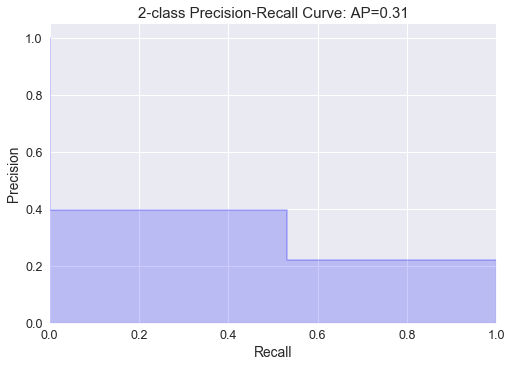

In [66]:
average_precision_NN = average_precision_score(y_test, NN_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_NN))
precision, recall, _ = precision_recall_curve(y_test, NN_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_NN))
plt.show()

#source: scikitlearn documentation

Confusion matrix
[[3547 1140]
 [ 618  695]]


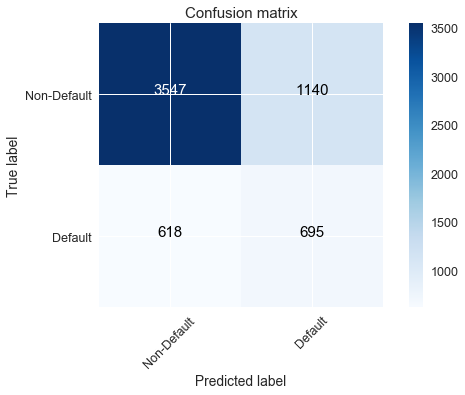

In [167]:
# Compute confusion matrix
class_names = ['Non-Default', 'Default']
plot_confusion_matrix(nn_conf, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

## Advantages of Model - Neural Network

Our approach in this analysis was to try a variety of classification algorithms, ranging from the classic approach of logistic regression, to the ‘black box’ approach of neural networks. The neural network classifier predicted 695 (53%) of default customers. This is an improvement over the “no model” approach, but is still not optimal. While this model does a reasonable job of predicting default status, we do not recommend this model as our final operational algorithm as there are some drawbacks: first, we attempted to extract feature importance with libraries ‘RFE’ and ‘select from model.’ These methods do not allow feature extraction on neural networks, and thus, is extremely difficult to pinpoint model coefficients/feature importance. Second, a neural network, with its inherent complexities, cannot beat a simpler model such as logistic regression. One advantage of the neural network model is, once trained, quick times to generate predictions. This baseline neural network model could benefit from additional layer size investigation. It is reasonable to conclude that model performance could improve with more hidden layers, yet also increases the risk of overfitting.  

The computed cost score associated with the Neural Network classifiation table is as follows. <br>
**Cost Score = (3622)(-1) + (1065)(10) + (615)(15) + (698)(-1) = 17805**

### Comparison of all Models

**Precision Overall (higher=better)** <br>
Logistic = 0.79; SVM Nonlinear = 0.79; SVM Linear = 0.78; Random Forest = 0.79; Neural Network =0.75   <br>
Advantage: Logistic, SVM Nonlinear, and Random Forest

**Recall Overall (higher=better)** <br>
Logistic = 0.77; SVM Nonlinear = 0.76; SVM Linear = 0.78; Random Forest = 0.78; Neural Network =0.72  <br>
Advantage: SVM Linear and Random Forest

** F1 Score Overall (higher=better)** <br>
Logistic = 0.78; SVM Nonlinear = 0.77; SVM Linear = 0.78; Random Forest = 0.79; Neural Network =0.73  <br>
Advantage: Random Forest

** Cost Score (lower=better)** <br>
Logistic = 11916; SVM Nonlinear = 12376; SVM Linear = 11741; Random Forest = 11299; Neural Network = 15555 <br>
Advantage: Random Forest

From our five models, the Random Forest stands above the rest of the models. The Neural Network  is clearly the least desirable option to this point.

## Feature Importance - Neural Network

Scikit-learn’s MLPClassifier does not allow us to extract features and their importance. Multiple attempts were made utilizing the aforementioned libraries. As an alternative to open-source technology, we replicated our neural network in the SAS tool JMP Pro (v13). As seen in our model parameters, the optimal activation function found via GridSearch is linear: rectified linear unit (ReLU). The below diagram is a simplification of our Python model; we have trimmed down the variables for ease of interpretation. This figure is a high-level diagram: 

In [59]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://raw.githubusercontent.com/JosDenney/Data_Mining/master/NN_diagram.png")

The feature importance of the neural network is below. The y-axis of the effects plot tells us the probability of default (1=default 0=not default). We see the probability of not defaulting increases with high payment amounts in periods 1 and 2. We also see a decreased probability of defaulting with education level 4 (other). The neural network does identify some interesting patterns in the PAY0 through PAY6 attributes. We see that for PAY0 and PAY2, the probability of defaulting increases during the early life of payments, possibly indicating that being “slightly behind” in payments is not sufficient evidence to conclude the customer will default. However, when we observer PAY3 and greater, we do see that in these later period, default becomes much more likely. This may be an intuitive pattern; however, it is one we will leverage in classification task 2, where we will seek to use a short period of customer payments to predict how far he/she will be in a future period. Payments 3 and 5 are also selected as significant: as customers make larger payments their probability of defaulting decreases. Credit balance is also indicative of default status: a larger credit limit is associated with a higher probability of not defaulting, possibly indicating these customers have made intelligent spending decisions in the past. Finally, we see that delinquent status is important. We can determine that being delinquent frequently increases one’s probability of defaulting.

<b> Double click to enlarge image</b>


In [63]:
Image(url="https://raw.githubusercontent.com/JosDenney/Data_Mining/master/NN_Pred_Prof2.png")


### Method 5: Naive Bayes

In [68]:
#make scoring function and set up parameter grid for search
NB_scorer = make_scorer(f1_score, pos_label = 1)
from sklearn.naive_bayes import BernoulliNB
NB_param_grid = {'alpha': [1,2,3,4,5,6,7,8,9,10] }

#Grid Search and fit
NB = BernoulliNB(fit_prior = True, binarize = 1)
NB_clf = GridSearchCV(NB, NB_param_grid, scoring = NB_scorer, cv = 10)
NB_clf.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=1, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [75]:
#save best estimator found in grid search and fit again
#predict in third step
NB_grid_model = NB_clf.best_estimator_
NB_grid_model.fit(X_train_res, y_train_res)
NB_test = NB_grid_model.predict(X_test_scaled)

In [76]:
#print the best paramter of C found and best score
print(NB_clf.best_score_)
print(NB_clf.best_params_)

0.6211050237119119
{'alpha': 7}


In [77]:
#generate confusion matrix
NB_conf = mt.confusion_matrix(y_test, NB_test)
print(NB_conf)

[[3836  851]
 [ 592  721]]


In [78]:
print(classification_report(y_test,NB_test))

             precision    recall  f1-score   support

          0       0.87      0.82      0.84      4687
          1       0.46      0.55      0.50      1313

avg / total       0.78      0.76      0.77      6000



## Visuals and Analysis - Naive Bayes

Average precision-recall score: 0.35


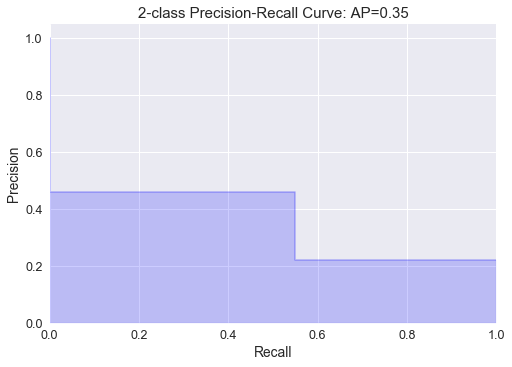

In [79]:
average_precision_NB = average_precision_score(y_test, NB_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_NB))
precision, recall, _ = precision_recall_curve(y_test, NB_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_NB))
plt.show()

#source: scikitlearn documentation

In [82]:
#calculate ROC_AUC Score
print(roc_auc_score(y_test, NB_test))

0.6837790547366432


Confusion matrix
[[3836  851]
 [ 592  721]]


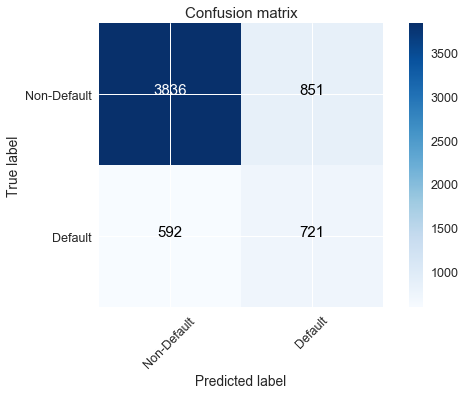

In [83]:
# Compute confusion matrix
class_names = ['Non-Default', 'Default']
plot_confusion_matrix(NB_conf, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

## Advantages of Model - Naive Bayes

Naive Bayes models offer numerous advantages when compared to other classification methods. They are relatively simple to implement and are computationally fast. Because they are simple and fast, they typically require less training data.

Additionally, Naive Bayes offers probablity predictions and are robust to outliers and/or noise in the data. One last advantage is that if the conditional independence assumption holds true, the model will converge quickly and find an optimal solution  faster than other discriminative classification models, such as logistic regression. 

The computed cost score associated with the Naive Bayes model classifiation table is as follows. <br>
**Cost Score = (3836)(-1) + (851)(10) + (592)(15) + (721)(-1) = 14128**


### Comparison of all Models
**Precision Overall (higher=better)** <br>
Logistic = 0.79; SVM Nonlinear = 0.79; SVM Linear = 0.78; Random Forest = 0.79; Neural Network =0.75; Naive Bayes = 0.78   <br>
Advantage: Logistic, SVM Nonlinear, and Random Forest

**Recall Overall (higher=better)** <br>
Logistic = 0.77; SVM Nonlinear = 0.76; SVM Linear = 0.78; Random Forest = 0.78; Neural Network =0.72; Naive Bayes = 0.76  <br>
Advantage: SVM Linear and Random Forest

** F1 Score Overall (higher=better)** <br>
Logistic = 0.78; SVM Nonlinear = 0.77; SVM Linear = 0.78; Random Forest = 0.79; Neural Network =0.73; Naive Bayes = 0.77  <br>
Advantage: Random Forest

** Cost Score (lower=better)** <br>
Logistic = 11916; SVM Nonlinear = 12376; SVM Linear = 11741; Random Forest = 11299; Neural Network = 15555; Naive Bayes = 12833 <br>
Advantage: Random Forest

## Feature  Importance - Naive Bayes

In [100]:
#Use Select From Model library to identify most influential variables
from sklearn.feature_selection import SelectFromModel
importance = SelectFromModel(NB_grid_model)
importance = importance.fit(X_train_res, y_train_res)
importance.get_support(indices=True)

#make a new data frame of the selected variables
NB_features = graphing_df.iloc[:,[3, 5,  6,  8, 13, 20, 21, 22, 23]]
pos =[[3, 5,  6,  8, 13, 20, 21, 22, 23]] 
colname = graphing_df.columns[pos]

print(colname)

Index(['EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'SEX_2', 'AgeBin_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3'],
      dtype='object')


The most significant variables in this model are 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'SEX_2', 'AgeBin_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', and 'BILL_AMT3'.

## Default Classification Summaries 

We examine the models from two different perspectives, first comparing the overall F1 scores, then by examining the differences between the false negative scores for each model. Using McNemar's test for signficance, we determine if the difference is statistically significant at a 95% confidence level. If the difference is significant we indicate which model performs better. If it is not, then we use our judgement to combine the results of McNemar and the Overall F1 score to judge the performance of the models.

** Overall F! Summaries **

In [140]:
#make summary of model performance
from collections import OrderedDict
summary= OrderedDict([ ('Method', ['GridSearch Logistic','GridSearch SVM_RBF','GridSearch SVM_Linear', 'GridSearch Random Forest',
                                  'GridSearch Neural Network', 'GridSearch NaiveBayes']),
                  ('Overall F1', [72, 78, 77, 79, 72, 76]),
                     ('Default F1', [48, 53, 49, 53, 44, 49]),
                     ('ROC-AUC Score', [67, 70, 68, 70, 64, 68])])
models = pd.DataFrame.from_dict(summary)
models

,Method,Overall F1,Default F1,ROC-AUC Score
0,GridSearch Logistic,72,48,67
1,GridSearch SVM_RBF,78,53,70
2,GridSearch SVM_Linear,77,49,68
3,GridSearch Random Forest,79,53,70
4,GridSearch Neural Network,72,44,64
5,GridSearch NaiveBayes,76,49,68


** Now the McNemar Test for Significance for each pair **

In [1]:
#McNemar's test since we are using the same data set
import pandas as pd
from scipy.stats import chi2
from IPython.display import Markdown,display
def McNemar(b,c,name_b,name_c):
   
    alpha = 0.95
    threshold = chi2.ppf(alpha,1)
    h = (b-c)*(b-c)/(b+c)
   
    if h > threshold:
        print("Comparison of" , name_b ," and", name_c, "is","Significant at level ", alpha)
        
        print("Number of missed defaults for ",name_b,":",b)
        print("Number of missed defaults for ",name_c,":",c)
        if b < c:
            winner = name_b
        else:
            winner = name_c
        print("Winner is", winner)
        
    else:
        print ("Comparison of" , name_b ," and", name_c, "is",'Not significant at level ', alpha)
        print("Number of missed defaults for ",name_b,":",b)
        print("Number of missed defaults for ",name_c,":",c)
        if b < c:
            winner = name_b
        else:
            winner = name_c
        print("Winner is", winner)

In [2]:

data = {'name':['Logistic Regression','NonLinear SVM','Linear SVM','RandomForest','Neural Network','Naive Bayes'],
       'false neg':[543,527,631,569,618,592]}
df = pd.DataFrame(data)

print("######## Significant Comparisons at level 0.95 ########")
i=0
j=1
while i < len(df)-1:
    j=1
    while j < len(df): 
        McNemar(df.iloc[i]['false neg'],df.iloc[j]['false neg'],df.iloc[i]['name'],df.iloc[j]['name'])
        #print(j)
        j=j+1
    i=i+1
df

######## Significant Comparisons at level 0.95 ########
Comparison of Logistic Regression  and NonLinear SVM is Not significant at level  0.95
Number of missed defaults for  Logistic Regression : 543
Number of missed defaults for  NonLinear SVM : 527
Winner is NonLinear SVM
Comparison of Logistic Regression  and Linear SVM is Significant at level  0.95
Number of missed defaults for  Logistic Regression : 543
Number of missed defaults for  Linear SVM : 631
Winner is Logistic Regression
Comparison of Logistic Regression  and RandomForest is Not significant at level  0.95
Number of missed defaults for  Logistic Regression : 543
Number of missed defaults for  RandomForest : 569
Winner is Logistic Regression
Comparison of Logistic Regression  and Neural Network is Significant at level  0.95
Number of missed defaults for  Logistic Regression : 543
Number of missed defaults for  Neural Network : 618
Winner is Logistic Regression
Comparison of Logistic Regression  and Naive Bayes is Not signif

,false neg,name
0,543,Logistic Regression
1,527,NonLinear SVM
2,631,Linear SVM
3,569,RandomForest
4,618,Neural Network
5,592,Naive Bayes


Ultimately, the difference between our two best performing models, Logistic Regression and Random Forest was not statistically significant at our chosen level of confidence, so we relied on other measures to help us select a final model. 

## Final Model Chosen

### Final Model Chosen: Random Forest

We tested six different classification models in effort to find the best solution for predicting probability of default. Our final rankings criteria was based upon the model's ability to accuractely classify non-defaults and defaults. We assessed the average precision, recall, and F1 scores from each model's classification table and ranked the models accordingly. <br>
    
** Average Precision: higher = better ** <br>
** Average Recall: higher = better ** <br>
** Average F1: higher = better ** <br>

Due to the nature of the business question posed, we developed a cost score for each model that penalized instances where the model incurred Type I errors. Similar to a medical diagnosis model that predicts cancer/no cancer for a patient, we wanted to priortize the model's ability to accurately predict default/no default in cases where the true measure was reported. The following cost matrix was developed and computed for each model based on the confusion metrics. <br>

** Cost Score = SUM (# True Positives)(-1) + (# False Positives)(10) + (False Negatives)(15) + (True Negatives)(-1): lower = better ** <br>

 
The summary results for all models are reported below, which are ranked from best to worst. <br>

**Precision**<br>
**1. (3 tied)** Logistic = 0.79; SVM Nonlinear = 0.79; Random Forest = 0.79 <br>
**4. (2 tied)** SVM Linear = 0.78; Naïve Bayes = 0.78 <br>
**6.** Neural Network = 0.75 <br>
Advantage: Logistic, SVM Nonlinear, and Random Forest

**Recall**<br>
**1. (2 tied)**  SVM Linear = 0.78; Random Forest = 0.78 <br>
**3.** Logistic = 0.77 <br>
**4. (2 tied)** SVM Nonlinear = 0.76; Naïve Bayes = 0.76 <br>
**6.** Neural Network = 0.72 <br> 
Advantage: SVM Linear and Random Forest

**F1**<br>
**1.** Random Forest = 0.79 <br> 
**2. (2 tied)** Logistic = 0.78; SVM Linear = 0.78; <br>
**4. (2 tied)** SVM Nonlinear = 0.77; Naïve Bayes = 0.77 <br>
**6.** Neural Network = 0.73 <br>
Advantage: Random Forest

** Cost Score**<br>
**1.** Random Forest = 11299 <br>
**2.** SVM Linear = 11741 <br>
**3.** Logistic = 11916  <br>
**4.** SVM Nonlinear = 12376  <br>
**5.** Naive Bayes = 12833  <br>
**6.** Neural Network = 15555  <br>
Advantage: Random Forest

Based on the scoring metrics, it is clear that the best model is the Random Forest. It produced the lowest cost score and the highest average F1 score. It was alwo tied for the highest average precision and recall scores. Therefore, the model chosen for predicting future borrower default is the Random Forest model. 

** Model 1 Feature Selection Benefits: **
After evaluating the feature importance plot for the Random Forest Classification model, we see some variables are simply not as important as others. We began with slightly over 40 variables. The variable importance plot tells us that we can remove some of the weaker predictors. The indices referenced pull out the critical variables and the model is ran once again using the parameters found via Grid Search. We can trim our predictors down to 27 instead of 40 and still have a strong model. The selected variables are PAY 0 - 6, DLQ 3 Months, Bill_AMT 1 – 6, PAY_AMT 1 – 6, LIMIT BAL, Age, and %Avail 1 – 6. 

## Task 2 - Classification at 3 months

### Modeling and Evaluation

Our second modeling task is to predict whether a customer will be behind on payments at a future billing period based on three months of observed behavior in addition to the given demographics. For this proof of concept, we will predict status in the sixth billing period. Stated differently, we will use three months of customer data to predict if the first three months of customer behavior are predictive of customer payment status in period 6. By implementing this solution, we will be able to assign a probability of a customer being behind three months in the future. We wish to identify the “at risk” customer early on, as we have several options to pursue. By knowing, for example, in March that in June, a customer will be behind on payments, allows us to be proactive in getting the customer current rather than reactive and simply ‘hoping’ the customer becomes current. Just as with predicting default status, we assume there is no algorithm in place in the current state to predict payment status three months in advance. If we were to take a random guess of a customer being behind in period 6, we have a 10.26% chance of identifying an at-risk customer. This probability is based on 3079/30000~10.26%. This approach is our first baseline to beat, and prove even more value by applying data mining techniques. Our goal is to significantly beat this ‘random guess’ approach.

Just as with default status predictions, this data set is heavily imbalanced. This class imbalance represents a hurdle for many classification algorithms, and is indicative of many ‘real-world’ data sets. We have seen from our first modeling efforts, however, that we do have options to overcome this class imbalance issue. For many of our chosen classification tasks, we use the class weight option = balanced in Scikit-Learn. This option allows us to “assign a larger penalty to wrong predictions on the minority class” (Python Machine Learning, 2nd ed. Sebastian Raschka and Vahid Mirjali, pg. 215). When classifiers do not have this option, we will utilize SMOTE: Synthetic Minority Oversampling Technique. We made successful use of SMOTE in predicting default status. 

### Metrics

Our preferred metric for this classification task, just like predicting default status, is the F1 score. We use this as our preferred metric because F1 considers precision and recall, two critical elements of solving this problem correctly. We want to minimize false positives, as they hinder our ability to take action on the customers who actually need some intervention. Our ultimate goal is to capture as many customers that will be behind, so we will need a strong emphasis on recall: to correctly predict the customers who will be struggling with payments. A false negative in this problem is a costly mistake. By not identifying the at-risk customers early on, we are no better than the current state which assumes no algorithmic approach. By taking advantage of benchmarking results on F1 score, we get the ‘best’ of both worlds as precision and recall are combined in the F1 score and calculated as:

2 X (Precision * Recall)/(Precision + Recall)

We will emphasis this metric throughout the analysis. Our grid search score is set to report the best F1 score. Our summary/classification reports highlight the F1 scores for the models. 

### Validation Methods

For our classification task, we will us a train/test split with 80% of our data set dedicated to training and 20% dedicated to testing. Test data is our best indicator of how our models will perform in a production environment. To reduce the variance introduced by each iteration having different observations/distributions in the train/test split, we will implement 10-fold cross validation. This will reduce variance by implementing multiple training sets instead of one during the grid search process. Using both cross-validation and a train/test split will produce a more robust model which can be more thoroughly validated. 

### Modify Data for Classification Task 2

In [23]:
#make a data frame for Classification Task 2
df3 = df2.drop(['DEFAULT', 'PAY_4', 'PAY_5','BILL_AMT4','BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5',
                'PAY_AMT6', '%Avail_4','%Avail_5','%Avail_6','DEFAULT'], axis = 1)

column_titles_task2 = ['EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_1','MARRIAGE_2','MARRIAGE_3','SEX_1', 
                       'SEX_2','AgeBin_1','AgeBin_2','AgeBin_3','AgeBin_4','AgeBin_5','PAY_0', 'PAY_2','PAY_3','BILL_AMT1',
                       'BILL_AMT2', 'BILL_AMT3','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'LIMIT_BAL', 'AGE', '%Avail_1', '%Avail_2',
                       '%Avail_3','PAY_6']
#reorder the columns
df4 = df3.reindex(columns=column_titles_task2)
#df4.info()

# Create a new column called df.PayStatus where the value is yes
df4['PAY_STATUS'] = np.where(df4['PAY_6']<=0, 0, 1)
df5 = df4.drop('PAY_6', axis = 1)
print('The following are the elements we will use for classification task 2:')
df5.info()

The following are the elements we will use for classification task 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
EDUCATION_1    30000 non-null uint8
EDUCATION_2    30000 non-null uint8
EDUCATION_3    30000 non-null uint8
EDUCATION_4    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
SEX_1          30000 non-null uint8
SEX_2          30000 non-null uint8
AgeBin_1       30000 non-null uint8
AgeBin_2       30000 non-null uint8
AgeBin_3       30000 non-null uint8
AgeBin_4       30000 non-null uint8
AgeBin_5       30000 non-null uint8
PAY_0          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
BILL_AMT1      30000 non-null float64
BILL_AMT2      30000 non-null float64
BILL_AMT3      30000 non-null float64
PAY_AMT1       30000 non-null float64
PAY_AMT2       30000 non-null float64
PAY_AMT3       3000

The created attribute PAY_STATUS is the dependent variable in this classification task. It tells whether a customer is behind on his/her payments in period 6. 

In [24]:
#create df for graphing
#make a data frame we will later need to plot variable importance
graphing_df2 = df5.drop('PAY_STATUS', axis = 1)

#create X and y variables for modeling
X_task2 = df5.drop('PAY_STATUS', axis = 1).values
y_task2 = df5['PAY_STATUS'].values

In [25]:
#create a train/test split of 80% of instances allocated for training and 20% allocated for test
#random state set for reproducibility
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
logreg_task2 = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_task2,y_task2,test_size=0.2, random_state = 42)

#scale our X values
#scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train_2) 

# find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data
X_train_scaled_2 = scl_obj.transform(X_train_2) # apply to training
X_test_scaled_2 = scl_obj.transform(X_test_2)

## Logistic Regression

In [37]:
#set up parameter grid search for C variable
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
log_scorer2 = make_scorer(f1_score, pos_label = 1)
log_param_grid_task2 = {'C': [0.001, 0.01, 0.1, 1, 2,10,1000] }
logreg_task2 = LogisticRegression(random_state = 0, class_weight = 'balanced')
logclf_task2 = GridSearchCV(logreg_task2, log_param_grid_task2, scoring =log_scorer2, cv = 10)

#fit model
logclf_task2.fit(X_train_scaled_2,y_train_2)

#Predict using Test data
log_grid_model2 = logclf_task2.best_estimator_
log_grid_model2.fit(X_train_scaled_2, y_train_2)
log_test2 = log_grid_model2.predict(X_test_scaled_2)

In [75]:
#print the best paramter of C found and best score
print(logclf_task2.best_score_)
print(logclf_task2.best_params_)

0.462801950274
{'C': 0.01}


In [76]:
from sklearn import metrics as mt
#evaluate performance via confusion matrix
log_conf_task2 = mt.confusion_matrix(y_test_2,log_test2)
print(log_conf_task2)

[[4517  890]
 [ 147  446]]


In [77]:
#take a look at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_2,log_test2))

             precision    recall  f1-score   support

          0       0.97      0.84      0.90      5407
          1       0.33      0.75      0.46       593

avg / total       0.91      0.83      0.85      6000



### Visuals and Analysis - Logistic Regression

Average precision-recall score: 0.28


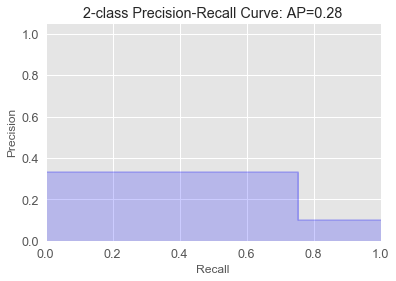

0.793753241613


In [78]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
average_precision_log_2 = average_precision_score(y_test_2, log_test2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_log_2))
precision, recall, _ = precision_recall_curve(y_test_2, log_test2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_log_2))
plt.show()

#source: scikitlearn documentation

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_2, log_test2))

The ROC curve generated a score of 0.79, which can be considered an 'above average' or 'fair' classification model.

Confusion matrix
[[4517  890]
 [ 147  446]]


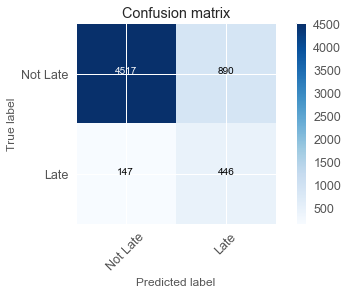

In [79]:
# Compute confusion matrix
from sklearn import metrics as mt
log_conf2 = mt.confusion_matrix(y_test_2,log_test2)

class_names = ['Not Late', 'Late']
plot_confusion_matrix(log_conf2, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

Based on the confusion matrix, the accuracy of our classifer is [(446 + 4517) / 6000] = 83%, which infers a misclassifed percentage of 17%.

### Feature Importance - Logistic Regression

In [80]:
# sort these attributes and print out model coefficients
zip_vars = zip(log_grid_model.coef_.T, graphing_df) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of',coef[0]) # now print them out

PAY_3 has weight of -0.215268231546
PAY_2 has weight of -0.213221011516
LIMIT_BAL has weight of -0.212529748897
PAY_AMT2 has weight of -0.173725025283
PAY_AMT1 has weight of -0.127039754709
%Avail_1 has weight of -0.111731875413
EDUCATION_4 has weight of -0.107128827485
BILL_AMT6 has weight of -0.0634775484415
%Avail_5 has weight of -0.0624436451587
MARRIAGE_2 has weight of -0.038904852804
SEX_2 has weight of -0.0366897274477
PAY_AMT4 has weight of -0.0366842486872
PAY_AMT6 has weight of -0.0358773082299
%Avail_3 has weight of -0.028366400161
%Avail_4 has weight of -0.0256274343629
BILL_AMT4 has weight of -0.021240970071
PAY_AMT5 has weight of -0.0139160886963
PAY_AMT3 has weight of -0.013697220719
MARRIAGE_3 has weight of -0.0075078473015
AgeBin_2 has weight of -0.00569714592234
AgeBin_1 has weight of -0.00433781251453
AgeBin_3 has weight of -0.00171248549746
BILL_AMT5 has weight of -0.000210016942363
EDUCATION_1 has weight of 0.00123034163354
EDUCATION_3 has weight of 0.0026629236026

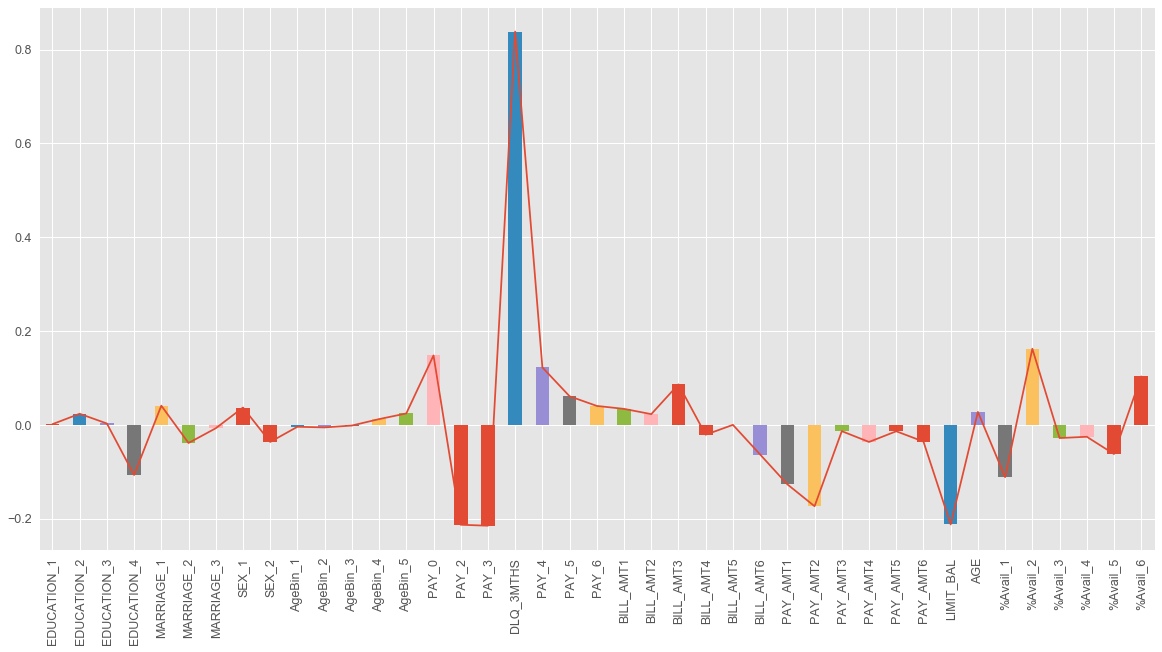

In [81]:
#Plot the coefficients that are significant in terms of weight. 
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(log_grid_model.coef_[0],index=graphing_df.columns)
weights.plot(kind='bar')
weights.plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

To get the odds ratios, we will exponentiate the logit coefficient values. For simplicity, we will focus on the coefficients that have a weight of >= 0.1. The odds ratios for the 5 'significant' variables are as follows. <br> BILL_AMT3: 0.27 <br> PAY_2: .33 <br> PAY_0: .42 <br> %Avail_3: .49 <br> PAY_3: .73
<br>

The most significant variable for this model is PAY_3, which represents the repayment status in July, 2005. From this, we can imply that the odds of default increase by .73 for customers with PAY_3 > 0, holding all other explanatory variables constant.


## Method 2: Naive Bayes

In [83]:
#use SMOTE to balance train/test split because Naive Bayes does not have class weight option
from imblearn.over_sampling import SMOTE
sm2 = SMOTE(random_state = 42)
X_train_res2, y_train_res2 = sm2.fit_sample(X_train_scaled_2, y_train_2)

In [84]:
#make scoring function and prepare for modeling by setting up a parameter grid to search
NB_scorer2 = make_scorer(f1_score, pos_label = 1)
from sklearn.naive_bayes import BernoulliNB
NB_param_grid2 = {'alpha': [1,2,3,4,5,6,7,8,9,10] }

NB2 = BernoulliNB(fit_prior = True, binarize = 1)
NB_clf2 = GridSearchCV(NB2, NB_param_grid2, scoring = NB_scorer2, cv = 10)
NB_clf2.fit(X_train_res2, y_train_res2)

GridSearchCV(cv=10, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=1, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [87]:
#save best estimator from grid search and refit
#predict in third step
NB_grid_model2 = NB_clf2.best_estimator_
NB_grid_model2.fit(X_train_res2, y_train_res2)
NB_test2 = NB_grid_model2.predict(X_test_scaled_2)

In [88]:
#print the best paramters found and best score
print(NB_clf2.best_score_)
print(NB_clf2.best_params_)

0.744021152042
{'alpha': 3}


In [89]:
#Generate confusion matrix
NB_conf2 = mt.confusion_matrix(y_test_2, NB_test2)
print(NB_conf2)

[[4598  809]
 [ 171  422]]


In [90]:
print(classification_report(y_test_2,NB_test2))

             precision    recall  f1-score   support

          0       0.96      0.85      0.90      5407
          1       0.34      0.71      0.46       593

avg / total       0.90      0.84      0.86      6000



### Visuals and Analysis - Naive Bayes

Average precision-recall score: 0.27


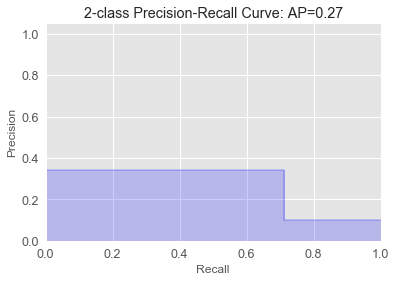

In [91]:
average_precision_NB2 = average_precision_score(y_test_2, NB_test2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_NB2))
precision, recall, _ = precision_recall_curve(y_test_2, NB_test2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_NB2))
plt.show()

#source: scikitlearn documentation

In [92]:
print(roc_auc_score(y_test_2, NB_test2))

0.781007444288


The ROC curve generated a score of 0.78, which can be considered an 'above average' or 'fair' classification model.

Confusion matrix
[[4598  809]
 [ 171  422]]


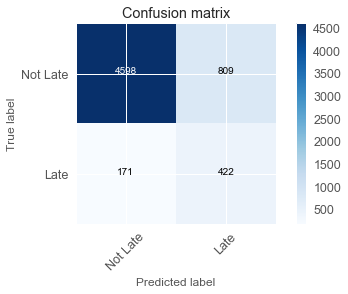

In [93]:
# Compute confusion matrix
class_names = ['Not Late', 'Late']
plot_confusion_matrix(NB_conf2, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

Based on the confusion matrix, the accuracy of our classifer is [(422 + 4598) / 6000] = 84%, which infers a misclassifed percentage of 16%.

### Feature Importance - Naive Bayes

In [94]:
#use Select from model library to extract feature importance
from sklearn.feature_selection import SelectFromModel
importance = SelectFromModel(NB_grid_model2)
importance = importance.fit(X_train_res2, y_train_res2)
importance.get_support(indices=True)

#make a new data frame of the selected variables
NB_features2 = graphing_df2.iloc[:,[3, 5,  6,  8, 13, 20, 21, 22, 23]]
pos =[[3, 5,  6,  8, 13, 20, 21, 22, 23]] 
colname = graphing_df2.columns[pos]

print(colname)

Index(['EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'SEX_2', 'AgeBin_5',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'LIMIT_BAL'],
      dtype='object')


The most significant variables in this model are 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'SEX_2',
       'AgeBin_5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', and 'LIMIT_BAL'

## Method 3: Decision Tree

In [95]:
#set up scoring function and prepare for grid search by setting up parameter search grid
from sklearn.tree import DecisionTreeClassifier
DT_scorer = make_scorer(f1_score, pos_label = 1)

DTparam_grid = {'max_depth': [3,4,5,6,7,8,9,10,11,12]}
    
#GridSearch and Fit
DT = DecisionTreeClassifier(random_state=0, class_weight='balanced')
DTclf = GridSearchCV(DT, DTparam_grid, scoring = DT_scorer, cv=10)

DTclf.fit(X_train_scaled_2, y_train_2)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [96]:
#save best estimator and refit
#predict in step three
DT_grid_model = DTclf.best_estimator_
DT_grid_model.fit(X_train_scaled_2, y_train_2)
DT_test = DT_grid_model.predict(X_test_scaled_2)

In [97]:
#print the best paramters found and best score
print(DTclf.best_score_)
print(DTclf.best_params_)

0.516681724262
{'max_depth': 5}


In [98]:
#Generate confusion matrix
DT_conf = mt.confusion_matrix(y_test_2, DT_test)
print(DT_conf)

[[4850  557]
 [ 195  398]]


In [99]:
print(classification_report(y_test_2,DT_test))

             precision    recall  f1-score   support

          0       0.96      0.90      0.93      5407
          1       0.42      0.67      0.51       593

avg / total       0.91      0.87      0.89      6000



### Visuals and Analysis - Decision Tree

<b>Double click to enlarge</b>

In [103]:
# from pydotplus import graph_from_dot_data
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(DT_grid_model, filled=True, rounded=True, class_names = ['Not Late', 'Late'],
#                          out_file=None)

# graph = graphviz.Source(dot_data)
# graph 
# Due to differences in rendering, we are importing this graphic from our github:

Image(url="https://raw.githubusercontent.com/JosDenney/Data_Mining/master/CC%20Default%20Decision%20Tree.png")

### Feature Importance - Decision Tree

In [104]:
#DT_grid_model.get_params(deep=True)

zip_vars = zip(DT_grid_model.feature_importances_.T, graphing_df2) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

AGE has weight of 0.0
AgeBin_1 has weight of 0.0
AgeBin_2 has weight of 0.0
AgeBin_3 has weight of 0.0
AgeBin_4 has weight of 0.0
AgeBin_5 has weight of 0.0
BILL_AMT2 has weight of 0.0
EDUCATION_1 has weight of 0.0
EDUCATION_2 has weight of 0.0
EDUCATION_4 has weight of 0.0
MARRIAGE_1 has weight of 0.0
MARRIAGE_2 has weight of 0.0
MARRIAGE_3 has weight of 0.0
PAY_AMT2 has weight of 0.0
SEX_1 has weight of 0.0
SEX_2 has weight of 0.0
EDUCATION_3 has weight of 0.0015308366751
BILL_AMT1 has weight of 0.00155403619329
BILL_AMT3 has weight of 0.00259570819365
PAY_AMT1 has weight of 0.00474728174939
PAY_AMT3 has weight of 0.00996579379866
%Avail_1 has weight of 0.0206337783974
LIMIT_BAL has weight of 0.0309288616284
%Avail_2 has weight of 0.0408489912304
PAY_2 has weight of 0.0417898809
PAY_0 has weight of 0.0753490519295
%Avail_3 has weight of 0.0995931627649
PAY_3 has weight of 0.670462616539


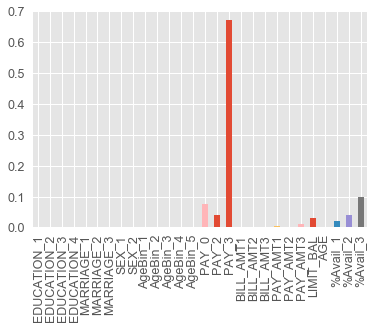

In [109]:
#Plot the coefficients
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(DT_grid_model.feature_importances_,index=graphing_df2.columns)
weights.plot(kind='bar')
plt.show()

The only significant variable(coefficient > 0.1) here is PAY_3 with a coefficient of .67. <br> %Avail_3 is close with a coefficient of .099

## Method 4: SGDClassifier

In [26]:
#set up scoring function and prepare for modeling by setting up grid search
from sklearn.linear_model import SGDClassifier

SG_scorer = make_scorer(f1_score, pos_label = 1)

SGparam_grid = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
               'loss': ['modified_huber', 'squared_hinge'],
               'penalty': ['l2', 'l1','elasticnet']}

SGD = SGDClassifier(random_state=0, n_jobs=-1, class_weight='balanced')
SGclf = GridSearchCV(SGD, SGparam_grid, scoring = SG_scorer, cv=10)

SGclf.fit(X_train_scaled_2, y_train_2)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'loss': ['modified_huber', 'squared_hinge']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, pos_label=1), verbose=0)

In [27]:
#save best estimator and refit
#predict in step 3
SG_grid_model = SGclf.best_estimator_
SG_grid_model.fit(X_train_scaled_2, y_train_2)
SG_test = SG_grid_model.predict(X_test_scaled_2)

In [112]:
#print the best paramters found and best score
print(SGclf.best_score_)
print(SGclf.best_params_)

0.48681205461
{'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l1'}


In [113]:
#Generate confusion matrix
SG_conf = mt.confusion_matrix(y_test_2, SG_test)
print(SG_conf)

[[4630  777]
 [ 161  432]]


In [114]:
print(classification_report(y_test_2,SG_test))

             precision    recall  f1-score   support

          0       0.97      0.86      0.91      5407
          1       0.36      0.73      0.48       593

avg / total       0.91      0.84      0.87      6000



## Visuals and Analysis: SGD Classifier

Average precision-recall score: 0.29


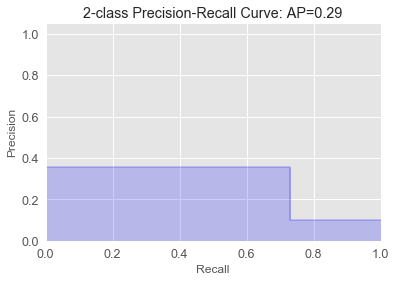

In [115]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
average_precision_log2 = average_precision_score(y_test_2, SG_test)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_log2))
precision, recall, _ = precision_recall_curve(y_test_2, SG_test)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_log2))
plt.show()

#source: scikitlearn documentation

In [116]:
print(roc_auc_score(y_test_2, SG_test))

0.792398274549


The ROC curve generated a score of 0.792, which would be considered an 'above average' classification model

Confusion matrix
[[4630  777]
 [ 161  432]]


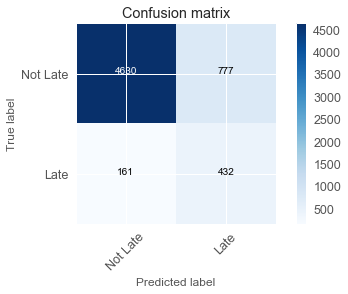

In [117]:
# Compute confusion matrix
class_names = ['Not Late', 'Late']
plot_confusion_matrix(SG_conf, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

The confusion matrix indicates an accuracy of 84% [(432 + 4630) / 6000], which infers a misclassifed percentage of 16%.

### Feature Importance: SGD Classifier

In [28]:
zip_vars = zip(SG_grid_model.coef_[0].T, graphing_df2) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

('EDUCATION_4', 'has weight of', -18.189899113928966)
('%Avail_1', 'has weight of', -0.27889244771100891)
('LIMIT_BAL', 'has weight of', -0.17295750981532729)
('%Avail_2', 'has weight of', -0.046950757000734422)
('EDUCATION_3', 'has weight of', -0.0015705240602638367)
('AGE', 'has weight of', 0.0)
('AgeBin_1', 'has weight of', 0.0)
('AgeBin_2', 'has weight of', 0.0)
('AgeBin_3', 'has weight of', 0.0)
('AgeBin_4', 'has weight of', 0.0)
('AgeBin_5', 'has weight of', 0.0)
('BILL_AMT1', 'has weight of', 0.0)
('BILL_AMT2', 'has weight of', 0.0)
('BILL_AMT3', 'has weight of', 0.0)
('EDUCATION_2', 'has weight of', 0.0)
('MARRIAGE_1', 'has weight of', 0.0)
('MARRIAGE_2', 'has weight of', 0.0)
('MARRIAGE_3', 'has weight of', 0.0)
('PAY_AMT1', 'has weight of', 0.0)
('PAY_AMT2', 'has weight of', 0.0)
('PAY_AMT3', 'has weight of', 0.0)
('SEX_1', 'has weight of', 0.0)
('SEX_2', 'has weight of', 0.0)
('EDUCATION_1', 'has weight of', 0.030061199305639434)
('PAY_2', 'has weight of', 0.1068431709623910

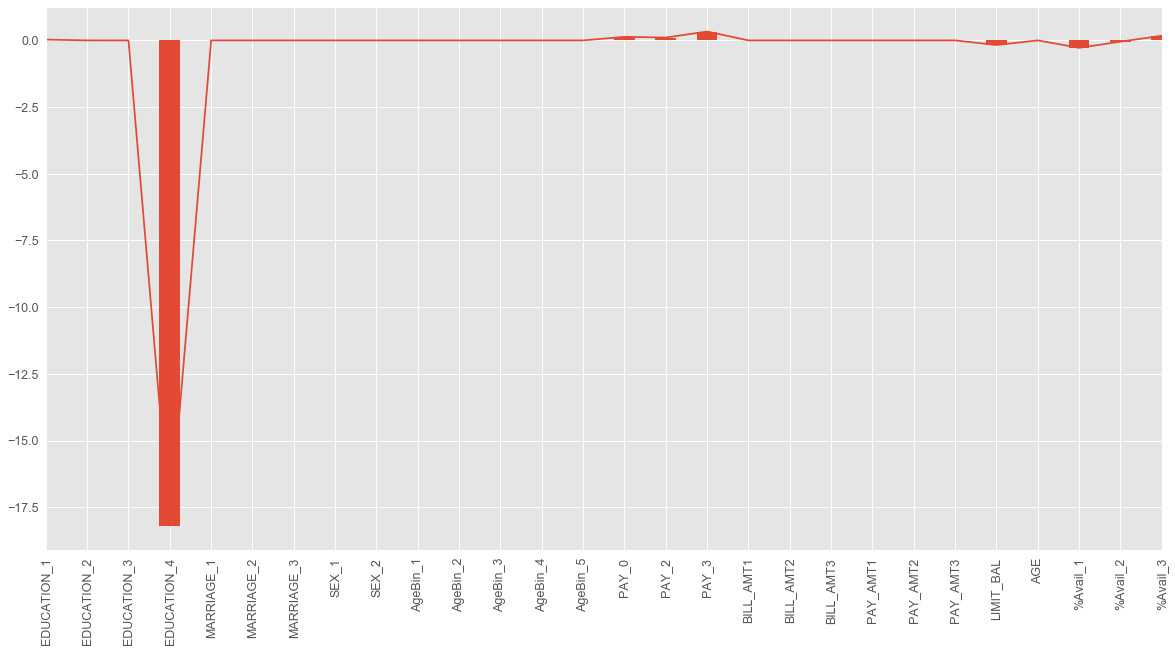

In [29]:
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(SG_grid_model.coef_[0],index=graphing_df2.columns)
weights.plot(kind='bar')
weights.plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

The most significat variable here by a wide margin is EDUCATION_4 with a coefficient of -18.19

## Method 5: Linear SVM

In [30]:
#make scoring function and set up parameter grid for searcg
from sklearn.svm import SVC
svm_scorer_2 = make_scorer(f1_score, pos_label = 1)
svm_param_grid_2 = {'C': [0.001, 0.01, 1, 10] }

#Create SVM instance and GridSearch
svm_2 = SVC(kernel = 'linear', random_state = 0, class_weight = 'balanced')
svmclf_2 = GridSearchCV(svm_2, svm_param_grid_2, scoring=svm_scorer_2, cv=10, n_jobs=-1)
svmclf_2.fit(X_train_scaled_2, y_train_2)

#save best estimator and refit
svm_grid_model_2 = svmclf_2.best_estimator_
svm_grid_model_2.fit(X_train_scaled_2, y_train_2)
svm_test_2 = svm_grid_model_2.predict(X_test_scaled_2)

#print the best paramter of C found and best score
print(svmclf_2.best_score_)
print(svmclf_2.best_params_)

#generate confusion matrix
svm_conf2 = mt.confusion_matrix(y_test_2, svm_test_2)
print(svm_conf2)

0.501083381371
{'C': 0.001}
[[4797  610]
 [ 186  407]]


In [31]:
#take a look at the classification report
print(classification_report(y_test_2,svm_test_2))

             precision    recall  f1-score   support

          0       0.96      0.89      0.92      5407
          1       0.40      0.69      0.51       593

avg / total       0.91      0.87      0.88      6000



### Visuals and Analysis: Linear SVM

Average precision-recall score: 0.31


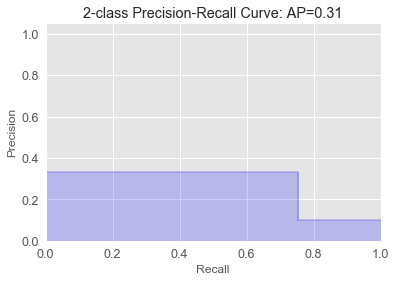

In [38]:
average_precision_svmlin2 = average_precision_score(y_test_2, svm_test_2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svmlin2))
precision, recall, _ = precision_recall_curve(y_test_2, log_test2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(
          average_precision_svmlin2))
plt.show()

#source: scikitlearn documentation

In [39]:
print(roc_auc_score(y_test_2, svm_test_2))

0.786761960871


The ROC curve generated a score of 0.79, which would be considered an 'above average' classification model

Confusion matrix
[[4797  610]
 [ 186  407]]


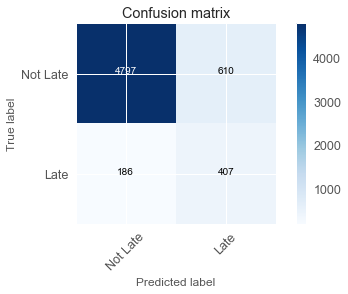

In [42]:
# Compute confusion matrix
class_names = ['Not Late', 'Late']
plot_confusion_matrix(svm_conf2, classes=class_names)
                      #title='Confusion matrix, without normalization')

plt.show()

The confusion matrix indicates an accuracy of 87% [(407 + 4797) / 6000], which infers a misclassifed percentage of 13%.

### Feature Importance - Linear SVM

In [ ]:
# sort these attributes and print out model coefficients
zip_vars2 = zip(svm_grid_model_2.coef_.T, graphing_df2) # combine attributes
zip_vars2 = sorted(zip_vars2)
for coef, name in zip_vars2:
    print(name, 'has weight of', coef[0]) # now print them out


In [ ]:
#Plot the coefficients
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(svm_grid_model_2.coef_[0],index=graphing_df2.columns)
weights.plot(kind='bar')
weights.plot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

The most significant variables for the model were found in variables PAY_0, PAY_2, PAY_3, LIMIT_BAL, %AVAIL_1 and %AVAIL_3. 

In [3]:
data = {'name':['Logistic Regression','Naive Bayes','Decision Tree','SGD','Linear SVM'],
       'false neg':[147,171,195,161,186]}
df = pd.DataFrame(data)

print("######## Significant Comparisons at level 0.95 ########")
i=0
j=1
while i < len(df)-1:
    j=1
    while j < len(df): 
        McNemar(df.iloc[i]['false neg'],df.iloc[j]['false neg'],df.iloc[i]['name'],df.iloc[j]['name'])
        #print(j)
        j=j+1
    i=i+1
df

######## Significant Comparisons at level 0.95 ########
Comparison of Logistic Regression  and Naive Bayes is Not significant at level  0.95
Number of missed defaults for  Logistic Regression : 147
Number of missed defaults for  Naive Bayes : 171
Winner is Logistic Regression
Comparison of Logistic Regression  and Decision Tree is Significant at level  0.95
Number of missed defaults for  Logistic Regression : 147
Number of missed defaults for  Decision Tree : 195
Winner is Logistic Regression
Comparison of Logistic Regression  and SGD is Not significant at level  0.95
Number of missed defaults for  Logistic Regression : 147
Number of missed defaults for  SGD : 161
Winner is Logistic Regression
Comparison of Logistic Regression  and Linear SVM is Significant at level  0.95
Number of missed defaults for  Logistic Regression : 147
Number of missed defaults for  Linear SVM : 186
Winner is Logistic Regression
Comparison of Naive Bayes  and Naive Bayes is Not significant at level  0.95
Numbe

,false neg,name
0,147,Logistic Regression
1,171,Naive Bayes
2,195,Decision Tree
3,161,SGD
4,186,Linear SVM


The results of our two best performing models otherwise, Decision Tree and Linear SVM were found to be not significant at the selected confidence level, therefor we will use other metrics to determine our final chosen model. 

## Final Model Chosen: Task 2

### Model Selected: Linear SVM

For task two, we tested five different classification models in effort to find the best solution for predicting probability of a customer being late in a future period (6). Our final rankings criteria was based upon the model's ability to accuractely classify late and on-time payments by the 6th billing period. We assessed the average precision, recall, and F1 scores from each model's classification table and ranked the models accordingly. <br>
    
** Average Precision: higher = better ** <br>
** Average Recall: higher = better ** <br>
** Average F1: higher = better ** <br>

Due to the nature of the business question posed, we developed a cost score for each model that penalized instances where the model incurred Type I errors. Similar to a medical diagnosis model that predicts cancer/no cancer for a patient, we wanted to priortize the model's ability to accurately predict late/not late in cases where the true measure was reported. The following cost matrix was developed and computed for each model based on the confusion metrics. <br>

** Cost Score = SUM (# True Positives)(-1) + (# False Positives)(10) + (False Negatives)(15) + (True Negatives)(-1): lower = better ** <br>

 
The summary results for all models are reported below, which are ranked from best to worst. <br>

**Precision**<br>
**1. (4 tied)** Logistic = 0.91; SGD = 0.91; Decision Tree = 0.91; SVM Linear = 0.91 <br>
**5.**  Naïve Bayes = 0.90 <br>

Advantage: Logistic, SGD, SVM Linear, and Decision Tree

**Recall**<br>
**1. (2 tied)**  SVM Linear = 0.87; Decision Tree = 0.87 <br>
**3. (2 tied)** SDG = 0.84; Naïve Bayes = 0.84 <br>
**5.** Logistic = 0.83 <br>

Advantage: SVM Linear and Decision Tree

**F1**<br>
**1.** Decision Tree = 0.89 <br> 
**2.** SVM Linear = 0.88 <br>
**3.** SGD = 0.87 <br>
**4.** Naïve Bayes = 0.86 <br>
**5.** Logistic = 0.85 <br>

Advantage: Decision Tree

** Cost Score**<br>
**1.** Decision Tree = 5057 <br>
**2.** SVM Linear = 5806 <br>
**3.** SGD = 8203 <br>
**4.** Naïve Bayes = 8825 <br>
**5.** Logistic = 9857 <br>

Advantage: Decision Tree

Based on the scoring metrics, it is clear that the two models that performed best are the Decision Tree and SVM Linear Models. Both models received high marks in average precision, recall,and F1 scores, and received the two lowest cost scores from the group

Even though the Decision Tree model produced higher F1 scores than the Linear SVM model, we stressed earlier the high priority on reducing the overall error rate. The benefit of the linear SVM is the low amount of false positives. This will allow us to focus on true at-risk customers. Additionally, we know this model will evolve to even better predictive capability after implementation because with a relatively low number of predictors, we capture 69% of at risk customers. By collecting additional customer data, whether it be demographic or behavior, will likely improve this model even more. The linear SVM is also chosen because of its ability to discriminate between our classes of interest. A challenge this model will likely face upon implementation is ease of interpretation. SVM is a difficult topic to explain. However, we do gain interpretation ability with our chosen ‘linear’ variant of this algorithm. By implementing this model, we will vastly improve upon the current state of relying on no model, thereby developing strategies to help at-risk customers and acting on said strategies.

**Model 2 Feature Selection Benefits:**

After evaluating the feature importance plot for the Support Vector Machine model, we see some variables are simply not as important as others. We began with approximately 28 variables. The variable importance plot tells us that we can remove some of the weaker predictors. The indices referenced pull out the critical variables and the model is ran once again using the parameters found via Grid Search. We can trim our predictors down to 15 instead of 28 and still have a strong model. The selected variables are PAY0-3, %Avail1-3, Bill AMT_3, LIMIT_BAL, PAY AMT3, Education Level. 

## Deployment

*How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*


This classification model would be ideal for a loaner such as a bank or credit union when deciding on loan contracts with their customers. Being able to accurately predict a customer's default status gives the loaner valuable insight. This allows the loaner to target specific customers that prove to be low-risk for their investments. The value of this model can be measured by the amount of loan defaults avoided as well as business gained from low-risk borrowers.

Deployment of the model is valuable for a loaner in two ways. First of all, it minimize the risk of distributing "bad loans". If an institution can identify customers to be potential defaulters ahead of time, they may choose to lower the loan amount, increase the interest rate, or decline the loan altogether. Conversely, if a customer is classified with a low risk of defaulting, banks can choose to target these individuals with incentives to take out a loan and increase their business and revenue.

To further improve our model, attributes such as credit score or income could be strong indicators of a borrower's default status. A model such as this should be updated monthly as most data points are measured on a month to month basis.

## Exceptional Work

During this project, we researched and implemented several new topics. First, we dealt with an imbalanced data set in a new way by utilizing SMOTE. We used SMOTE on instances where we did not have a class weight option in our algorithm parameters. We researched SMOTE in “SMOTE: Synthetic Minority Over-Sampling Technique,” Journal of Artificial Intelligence Research 16 (2002) 32-357 (Chawla, Bowyer, Hall, and Kegelmeyer). This process was a valuable learning for future modeling and offered improved modeling on this imbalanced data set.

A second approach we provide in this analysis is the use of a new classification method not taught in the course. For example, we researched and implemented a Neural Network Classifier (MLPClassifier). We also overcame feature extraction difficulties by utilizing the SAS tool JMP Pro v13. In addition to this new method, we developed more models than required, with a total of ten models trained and tested.

Third, we learned and implemented a parallel grid search using the n_jobs command. Per the Scikit-learn documentation, “n_jobs means that the computation will be dispatched to all CPUs of the computer” (Scikit-Learn Documentation).

Finally, we made use of two new libraries to visualize our decision tree classifier in classification task 2: pydot plus and graphviz.
